<a href="https://colab.research.google.com/github/sohammistri/BTP/blob/main/IITBProject_OCR_Detection_Table_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Type-TD-TSR Demo Notebook
## 1. Install all the prerequisite


In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# opencv is pre-installed on colab

# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions

!sudo apt install tesseract-ocr 
!pip install pytesseract

import torch, torchvision
torch.__version__
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'detectron2' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached black-22.3.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
  Attempting uninstall: black
    Found existing installation: black 21.4b2
    Uninstalling black-21.4b2:
      Successfully uninstalled black-21.4b2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.5+cu101 requires black==21.4b2, but you have black 22.3.0 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatical

## 2. Clone the Repository 

In [ ]:
!git clone https://github.com/Psarpei/Multi-Type-TD-TSR.git
!mv Multi-Type-TD-TSR/ Multi_Type_TD_TSR

Cloning into 'Multi-Type-TD-TSR'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 302 (delta 65), reused 59 (delta 59), pack-reused 228
Receiving objects: 100% (302/302), 17.19 MiB | 27.80 MiB/s, done.
Resolving deltas: 100% (168/168), done.
mv: cannot move 'Multi-Type-TD-TSR/' to 'Multi_Type_TD_TSR/Multi-Type-TD-TSR': Directory not empty


## 3. Download Table Detection Weights and Configuration File

In [ ]:
!gdown --id 11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
!gdown --id 1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
!gdown --id 1PfA2uws919gc893-x9uMIz06zWEko8nF 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
To: /content/model_final.pth
100% 1.10G/1.10G [00:04<00:00, 272MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
To: /content/All_X152.yaml
100% 534/534 [00:00<00:00, 978kB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: htt

## 4. Import Everything

In [ ]:
import detectron2
import Multi_Type_TD_TSR.google_colab.deskew as deskew
import Multi_Type_TD_TSR.google_colab.table_detection as table_detection
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_all as tsra
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines as tsrl
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_wol as tsrwol
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines_wol as tsrlwol
import Multi_Type_TD_TSR.google_colab.table_xml as txml
import Multi_Type_TD_TSR.google_colab.table_ocr as tocr
import pandas as pd
import os
import json
import itertools
import random
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
from google.colab.patches import cv2_imshow
setup_logger()

<Logger detectron2 (DEBUG)>

In [ ]:
import detectron2
import Multi_Type_TD_TSR.google_colab.deskew as deskew
import Multi_Type_TD_TSR.google_colab.table_detection as table_detection
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_all as tsra
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines as tsrl
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_wol as tsrwol
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines_wol as tsrlwol
import Multi_Type_TD_TSR.google_colab.table_xml as txml
import Multi_Type_TD_TSR.google_colab.table_ocr as tocr
import pandas as pd
import os
import json
import itertools
import random
from detectron2.utils.logger import setup_logger
# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
from google.colab.patches import cv2_imshow
setup_logger()

<Logger detectron2 (DEBUG)>

## 5. Initialize Table Detection Detector

In [ ]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('/content/All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = '/content/model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

[11/05 14:27:51 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

  pixel_mean
  pixel_std


#Table Rotation

ORIGINAL IMAGE:


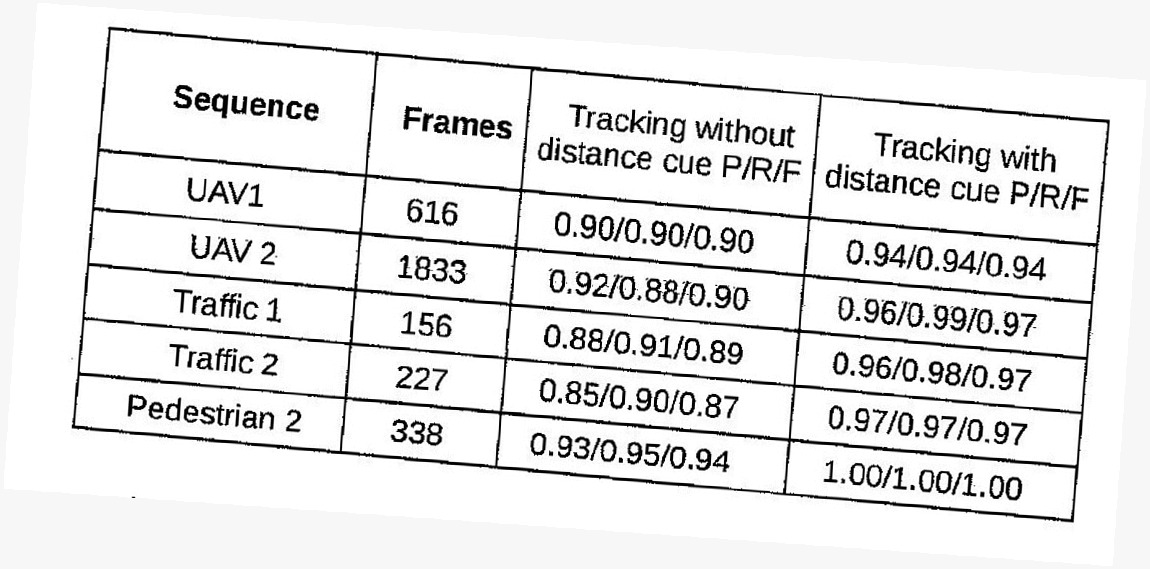


DESKEWED IMAGE:


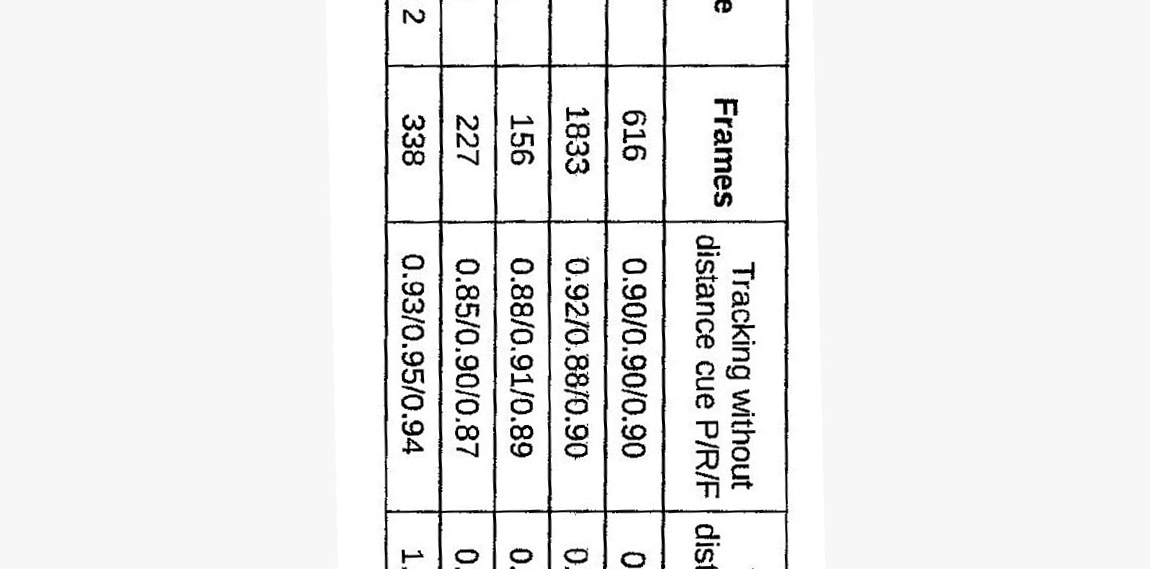

In [ ]:
# path to the image scan of the document
file = "/content/Multi_Type_TD_TSR/images/rotated_example.jpeg" 

# load the image from disk
original_image = cv2.imread(file)
deskewed_image = deskew.deskewImage(original_image)

print("ORIGINAL IMAGE:")
cv2_imshow(original_image)

print()

print("DESKEWED IMAGE:")
cv2_imshow(deskewed_image)

# Table Detection

TABLE DETECTION:


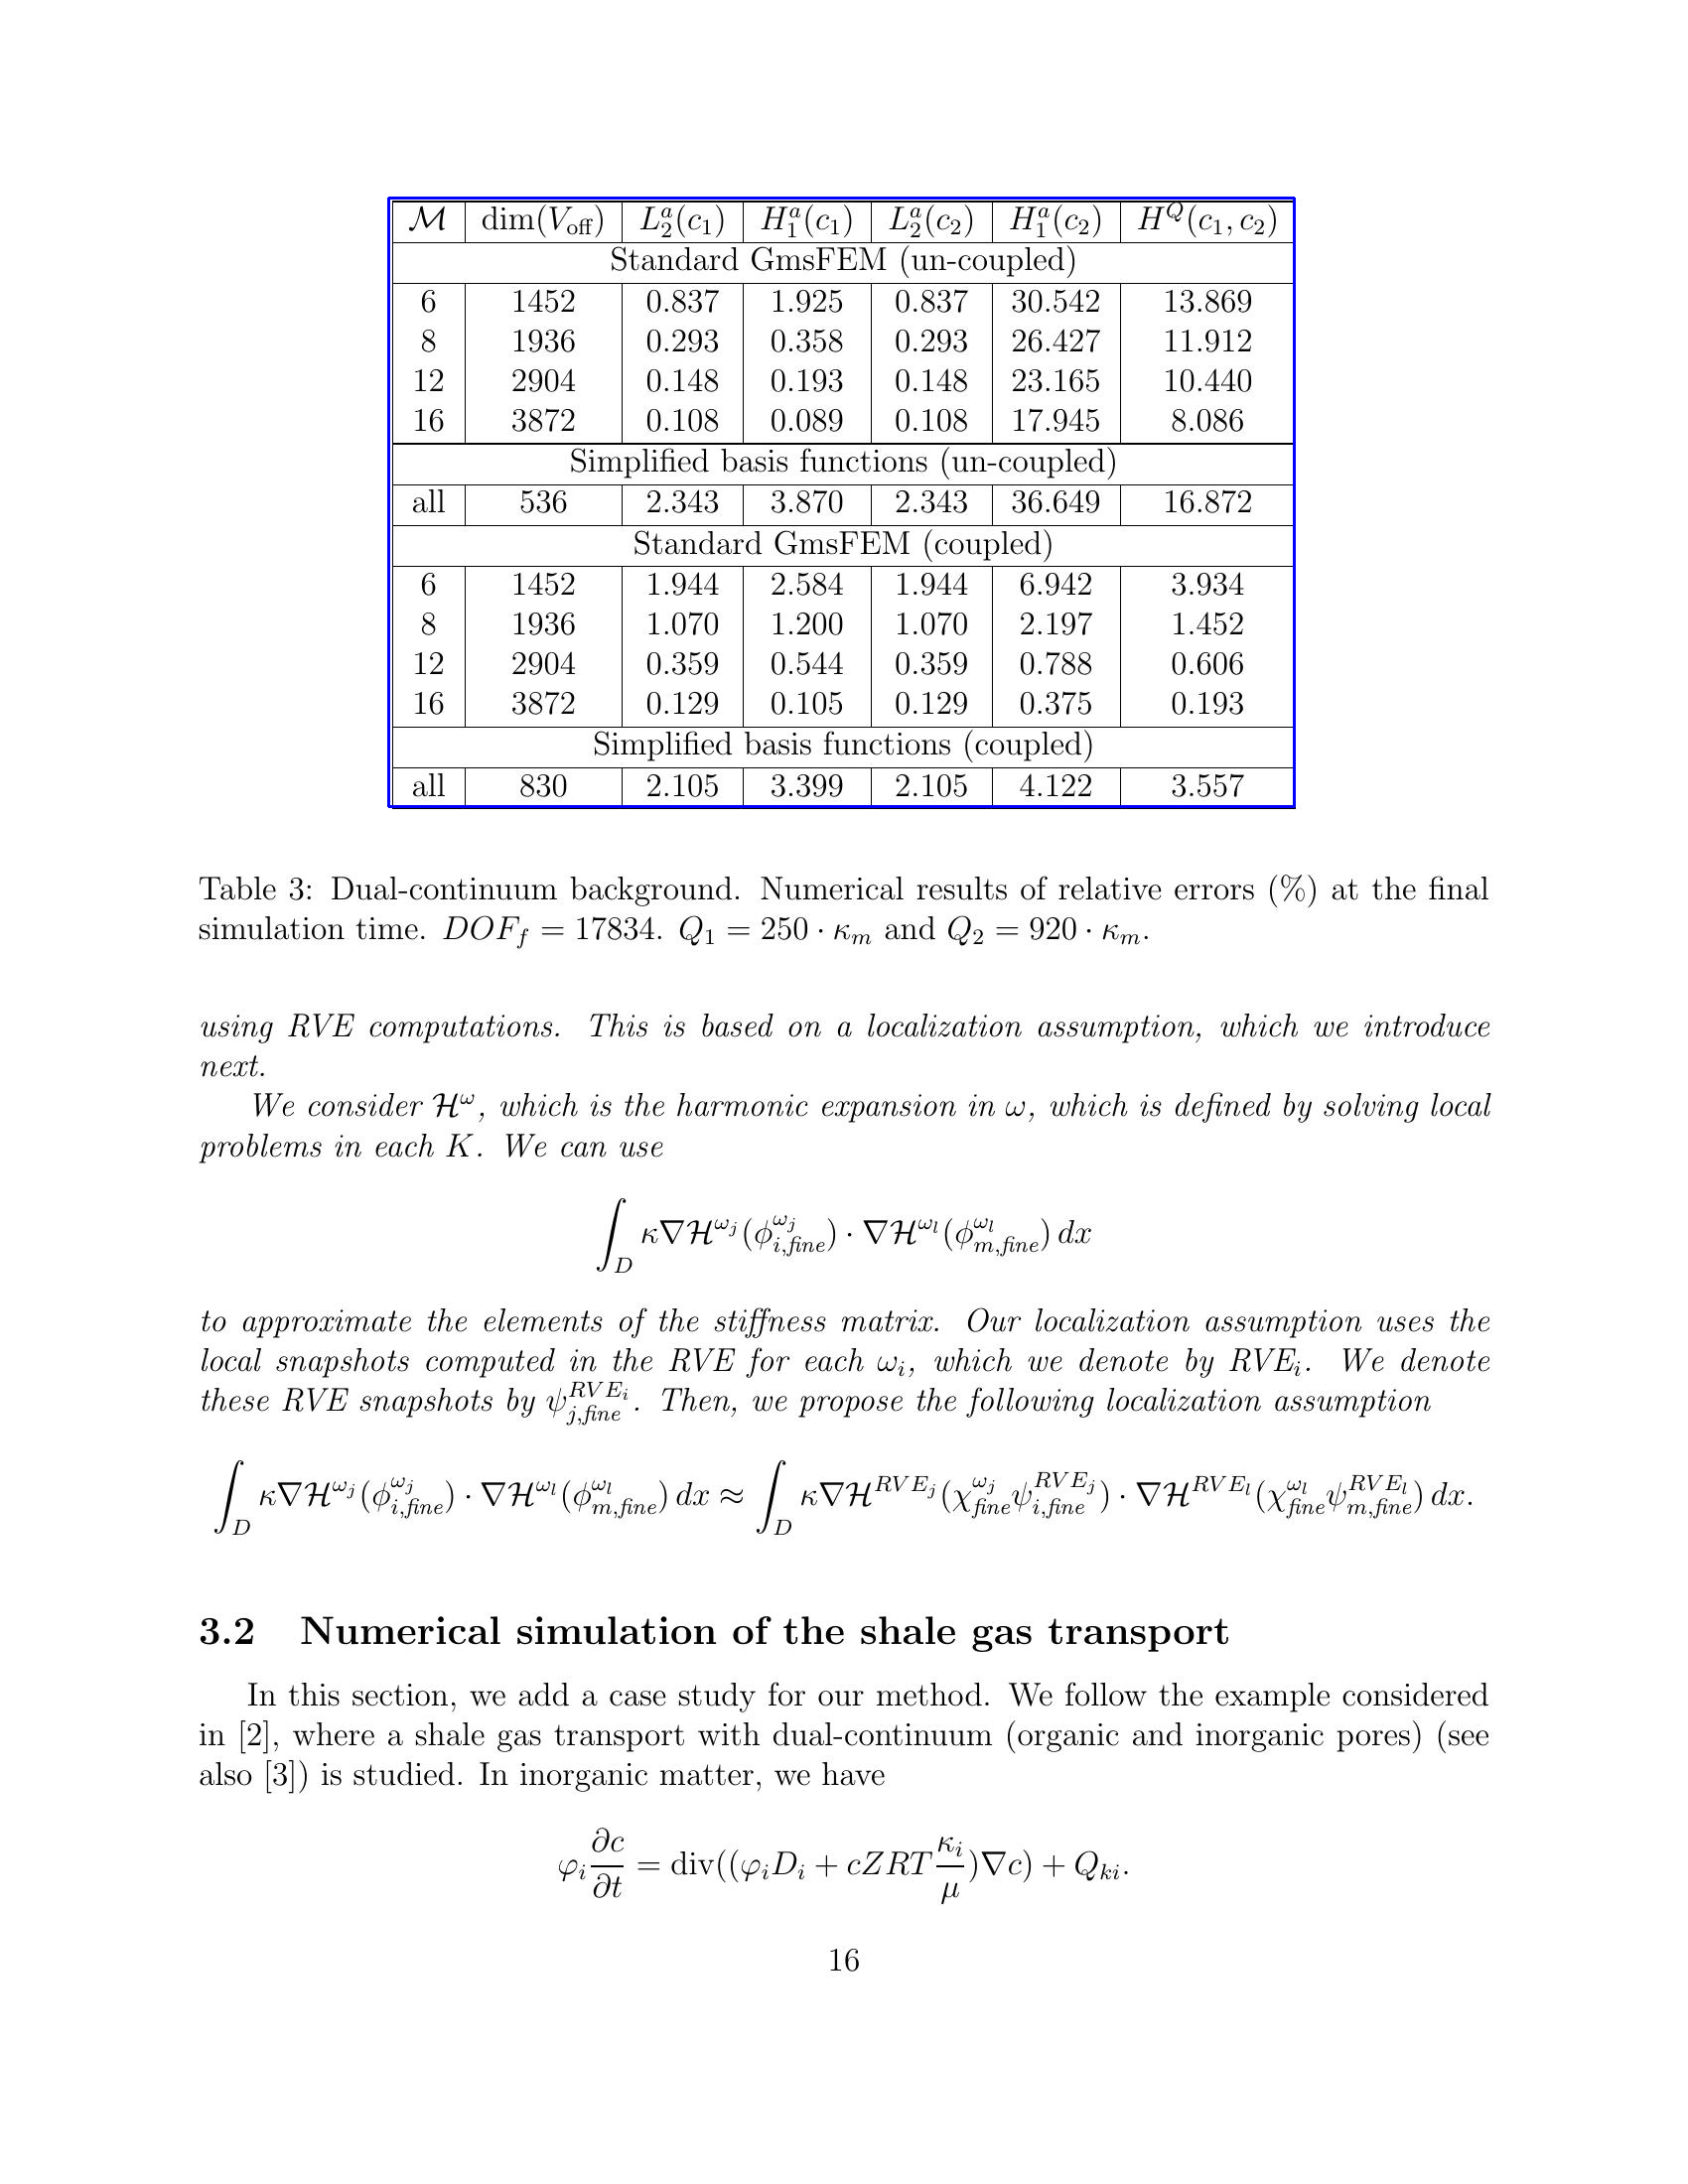

In [ ]:
document_img = cv2.imread("/content/Multi_Type_TD_TSR/images/try_tatar_1702.07095.gz_paper10_revised4_withbib_15_ori.jpg")
table_detection.plot_prediction(document_img, predictor)


TABLE 0 :


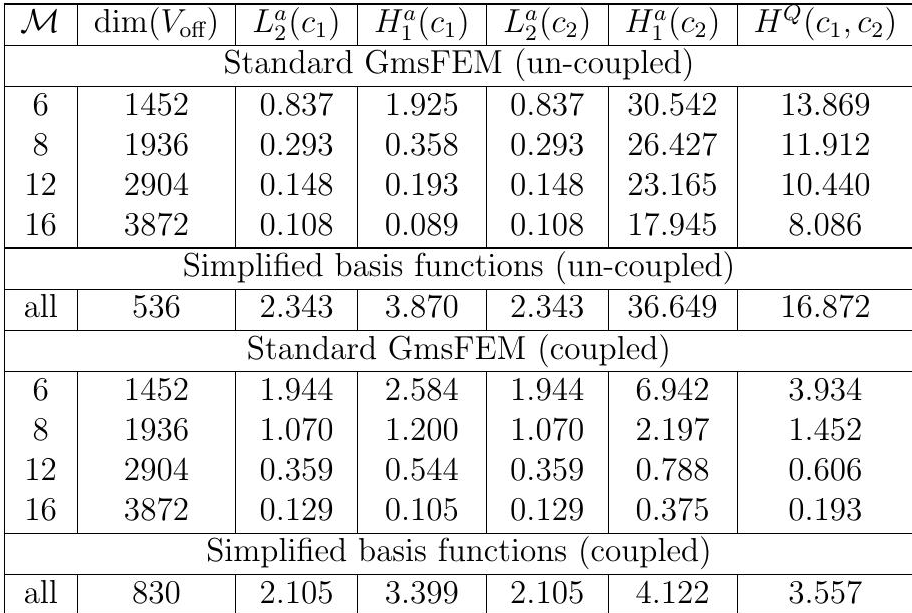

In [ ]:
table_list, table_coords = table_detection.make_prediction(document_img, predictor)

#Table Structure Recognition Partially Bordered Tables
# with Color Invariance Pre-Processing

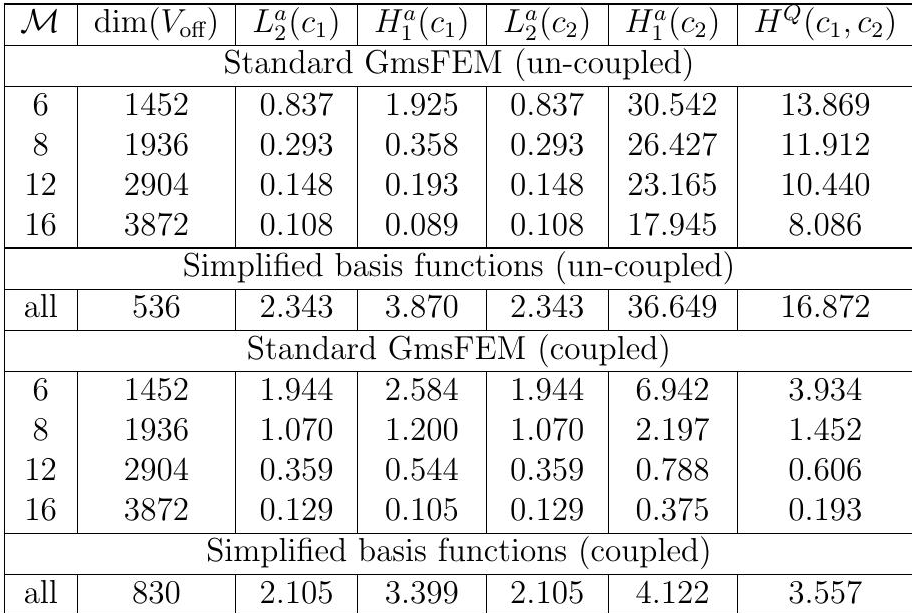

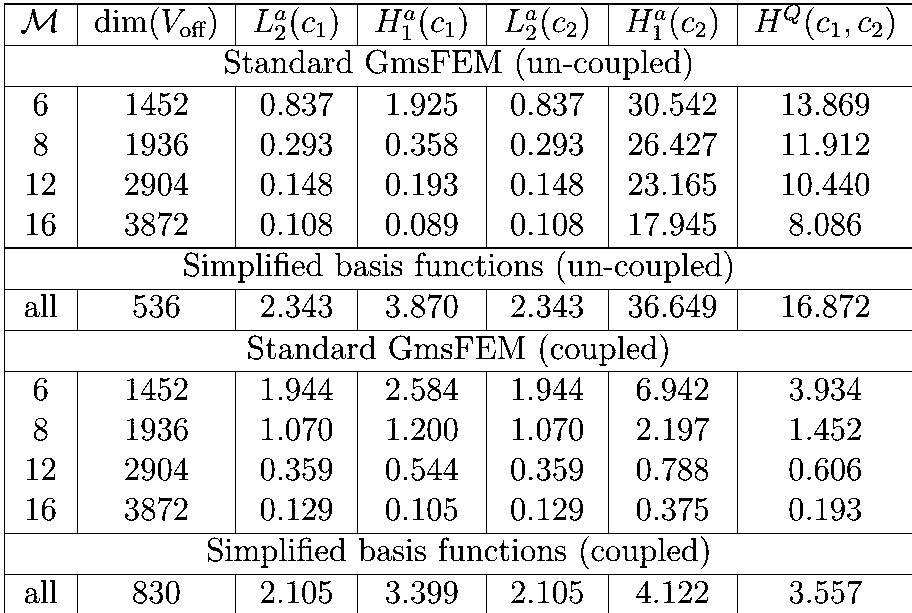

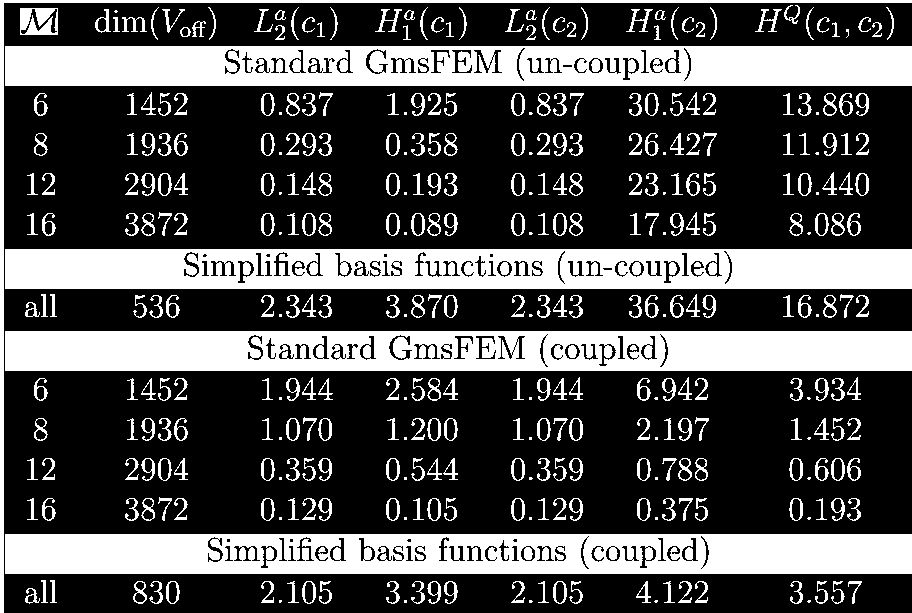

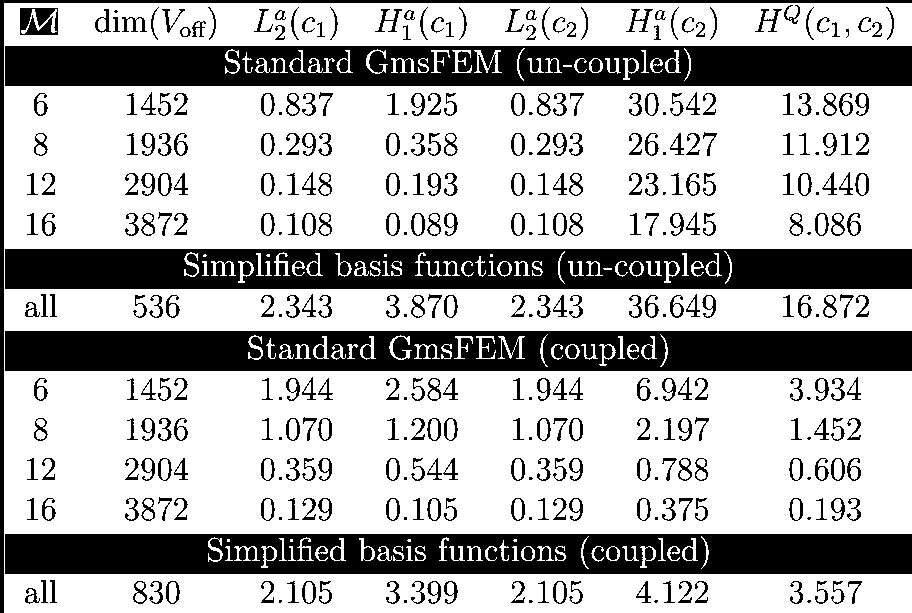

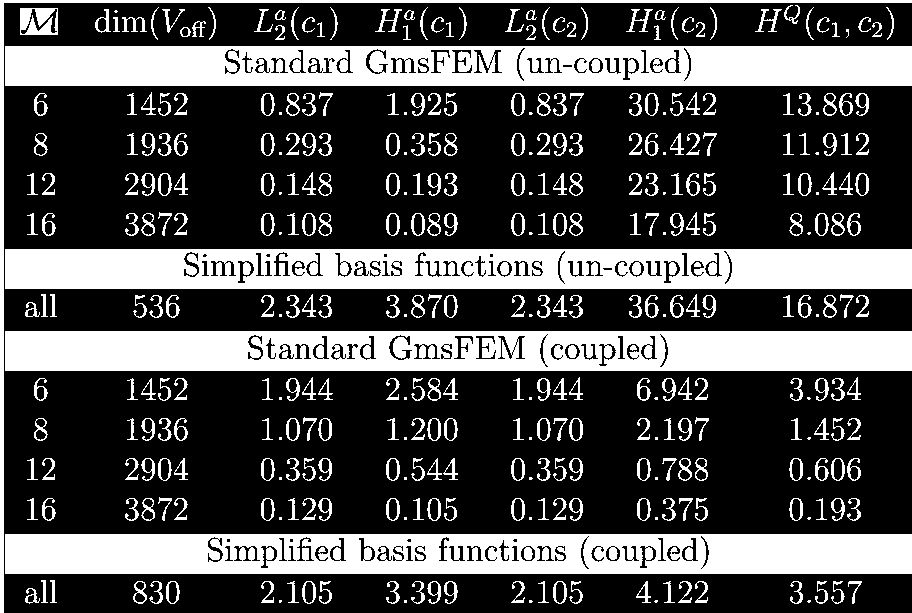

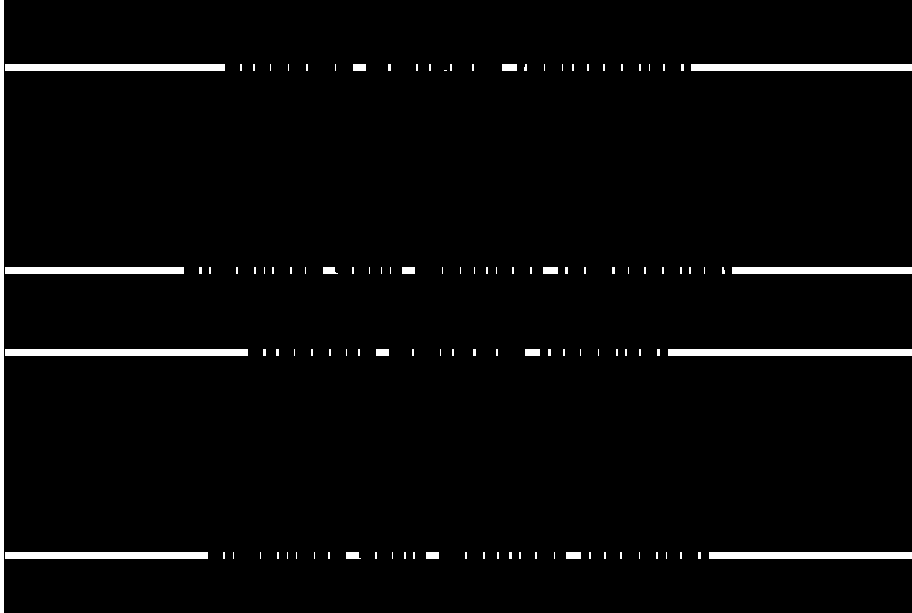

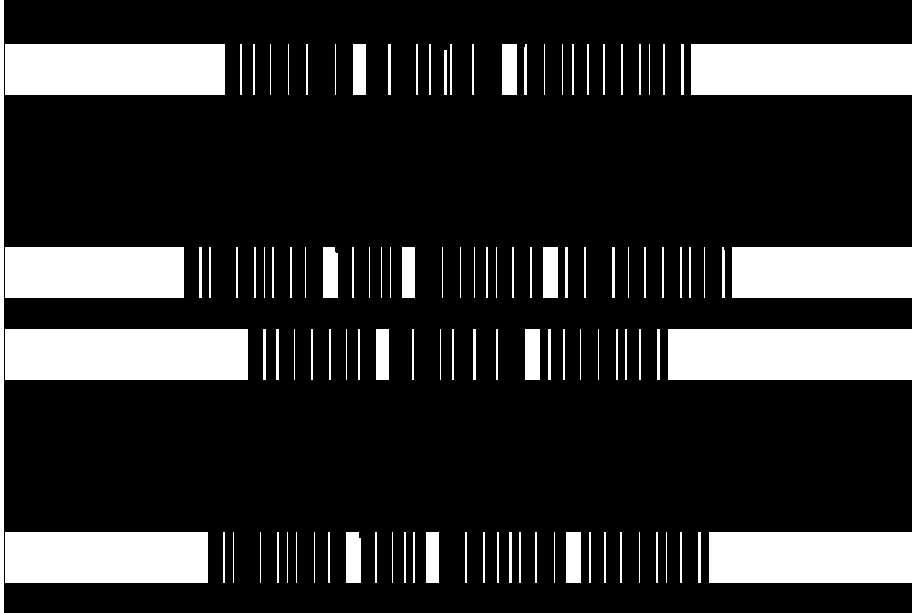

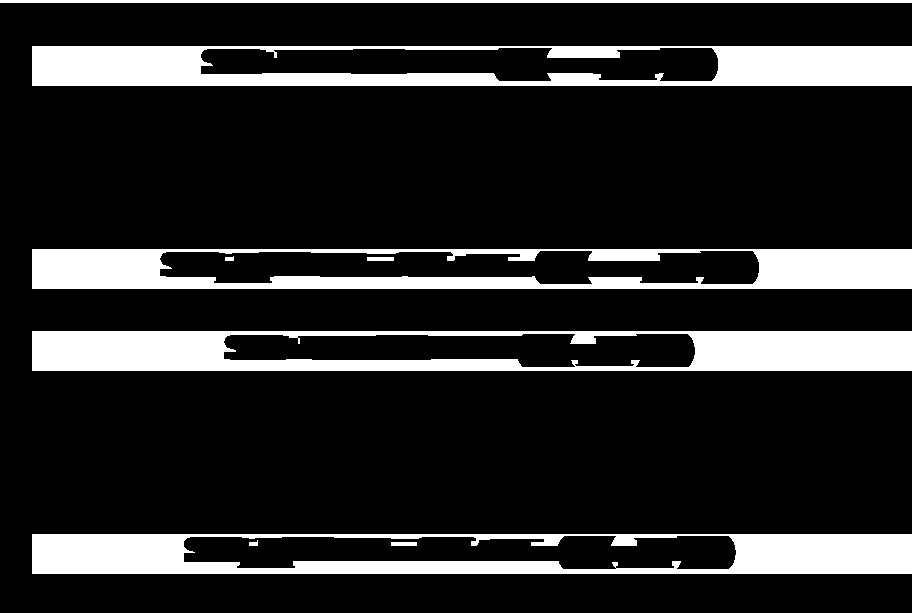

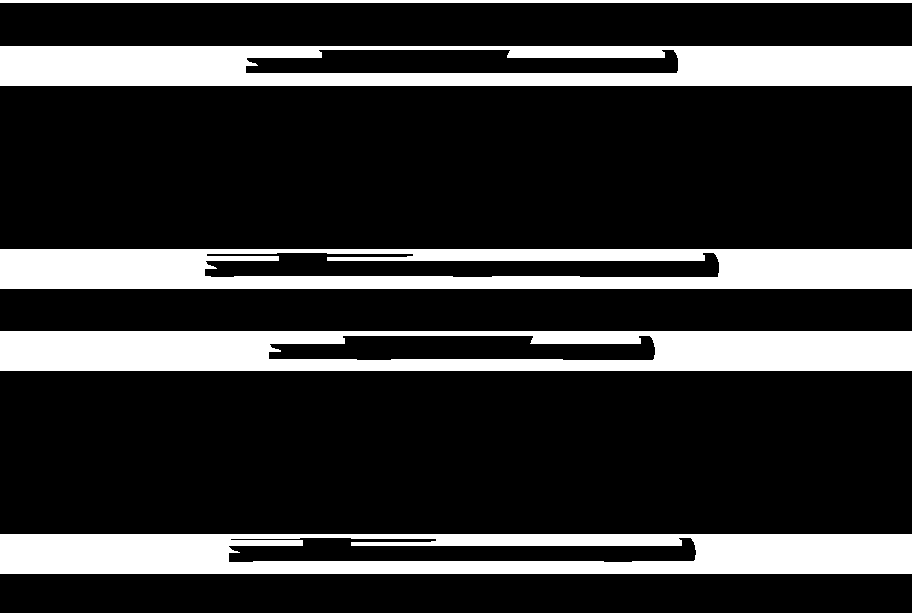

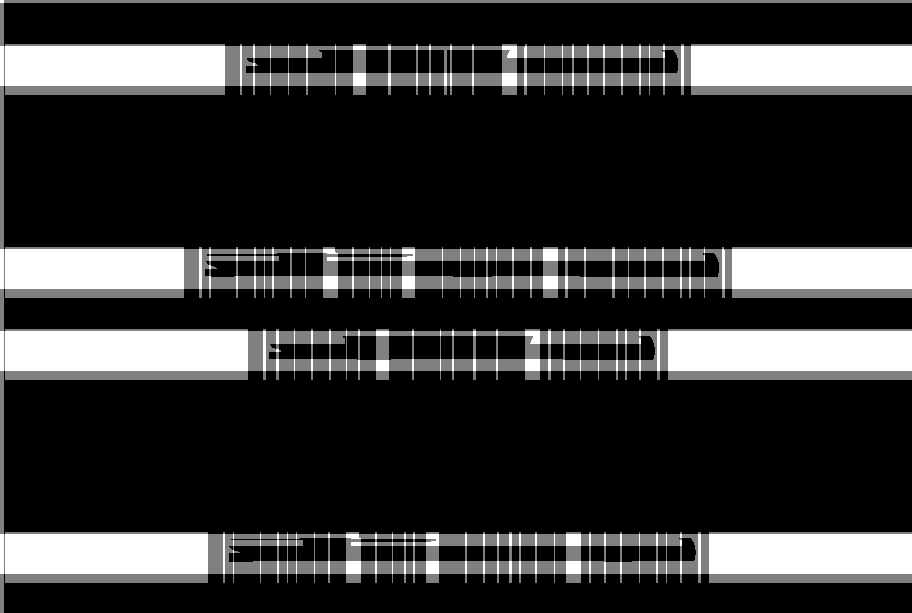

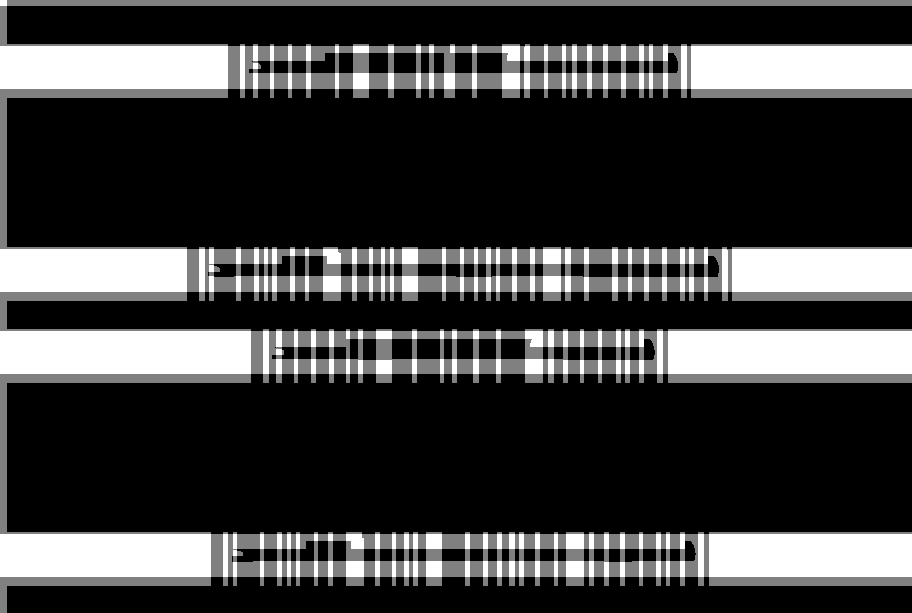

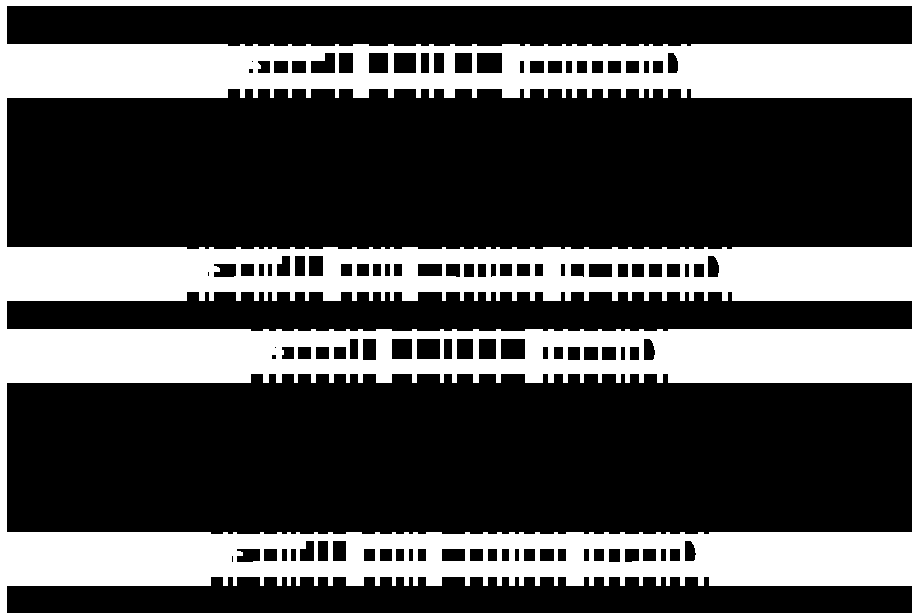

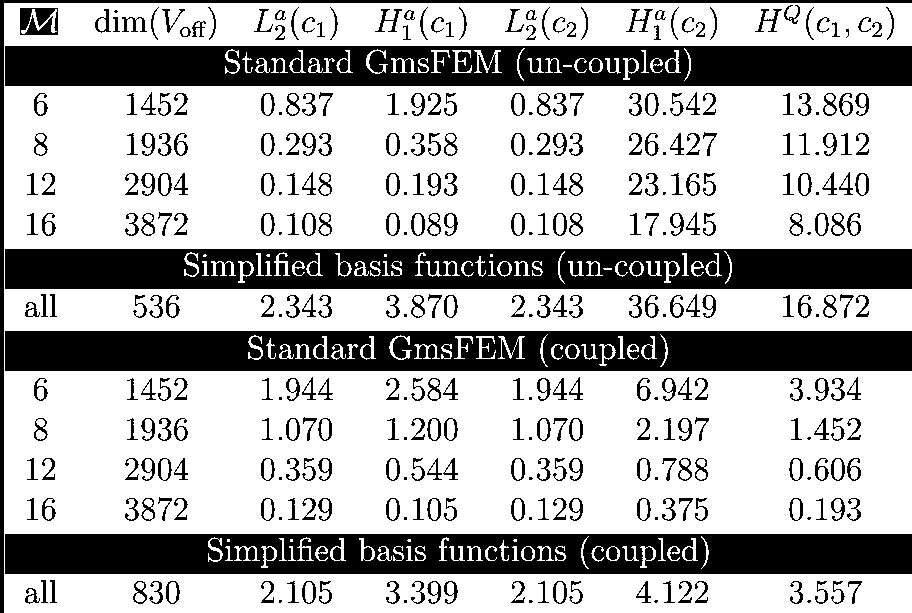

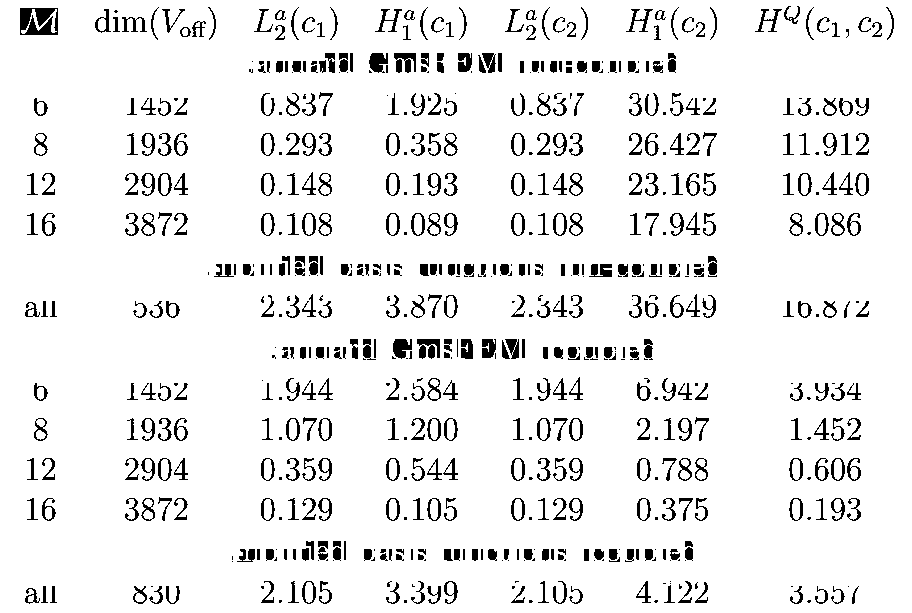

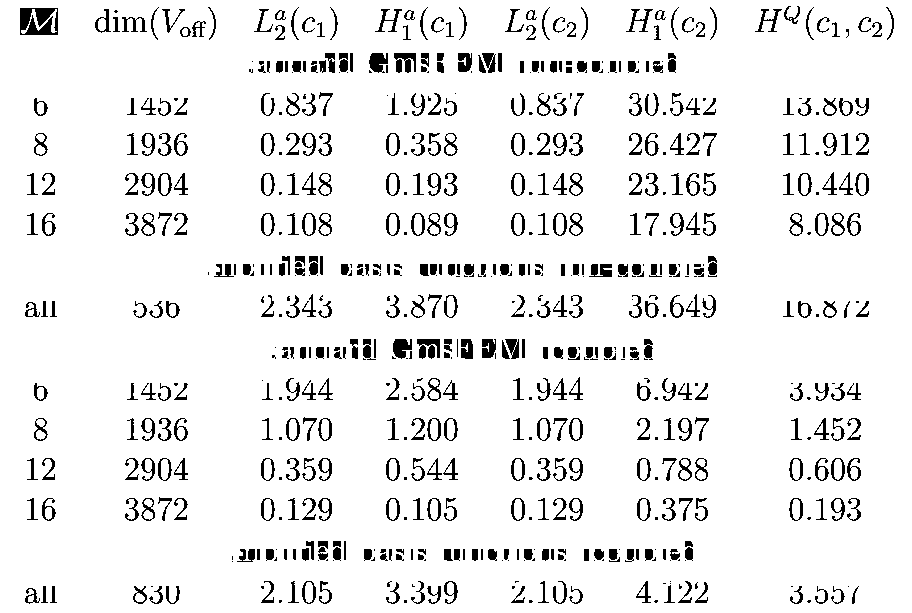

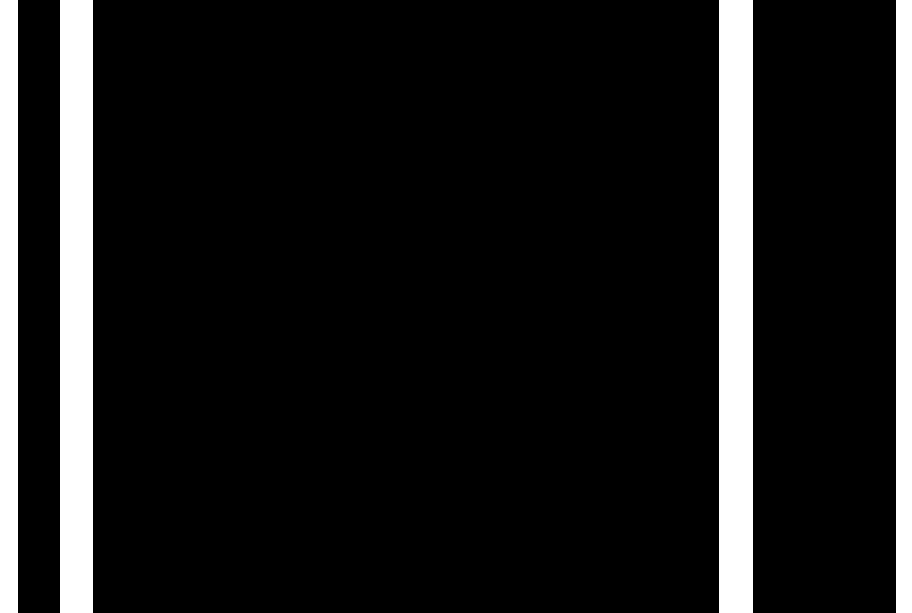

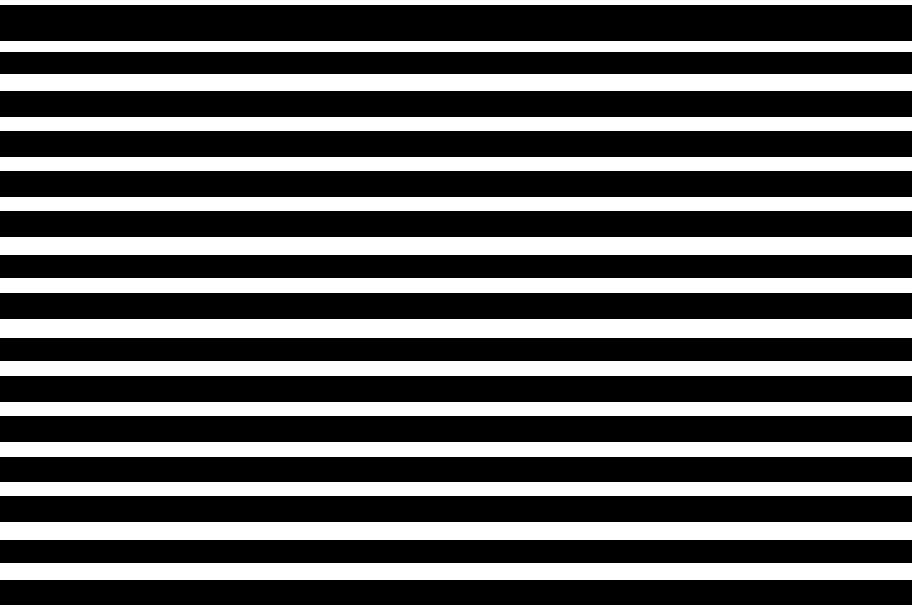

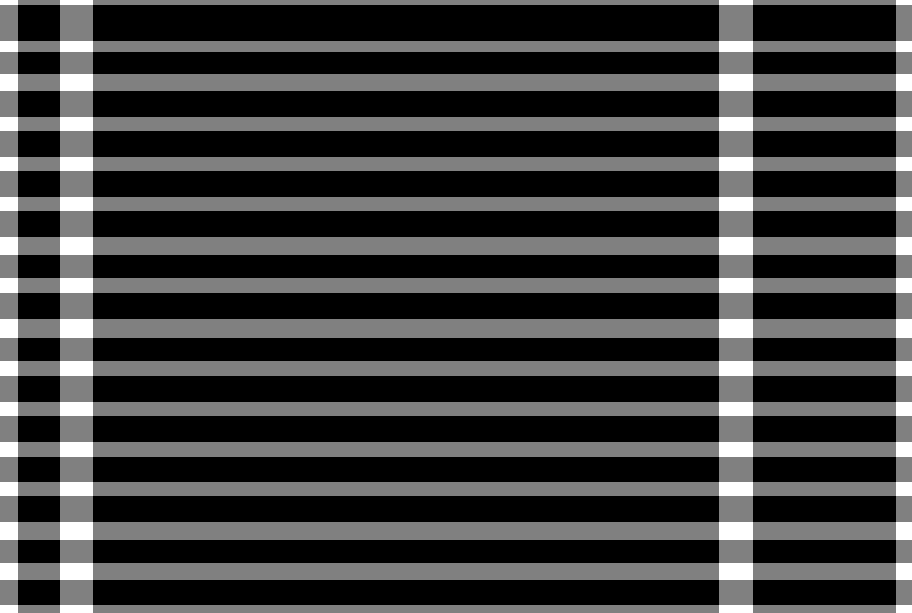

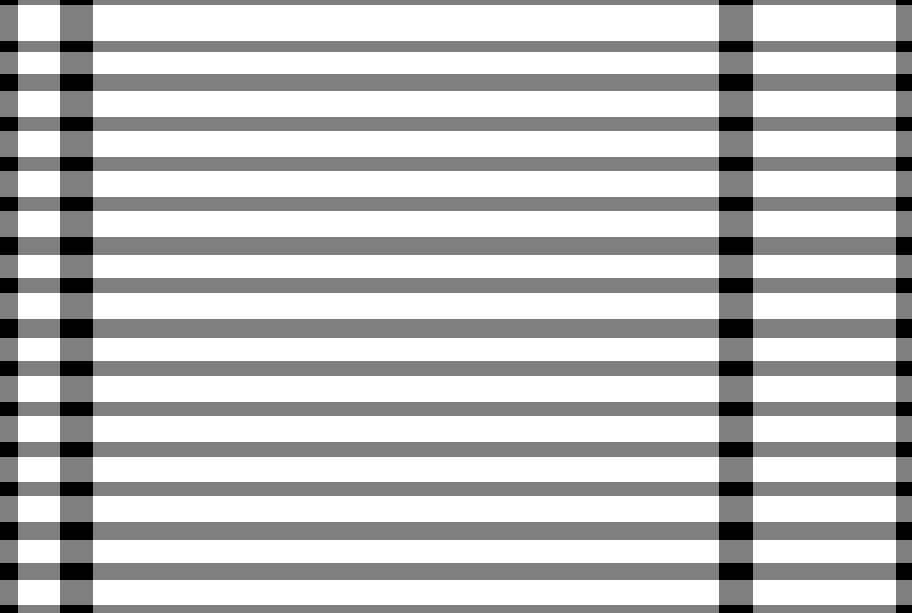

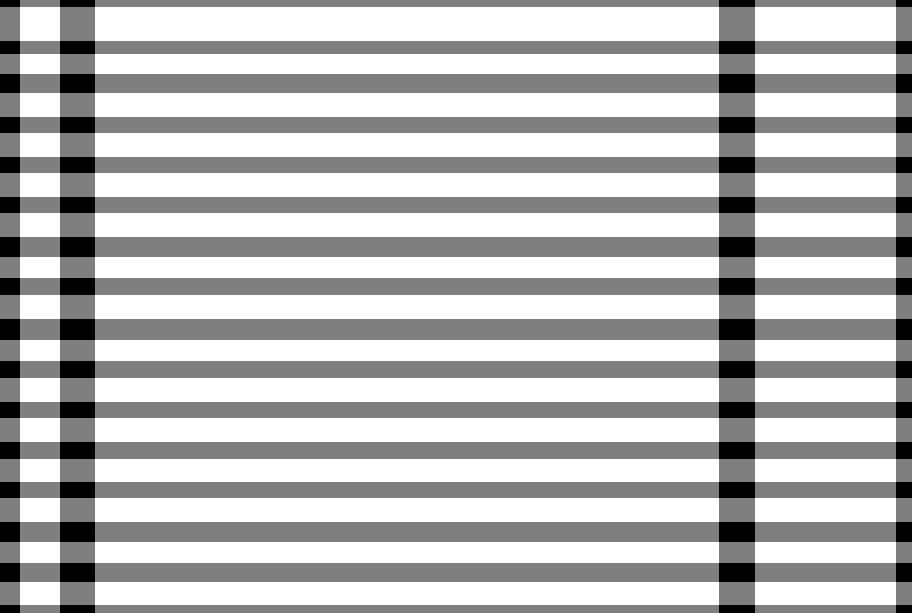

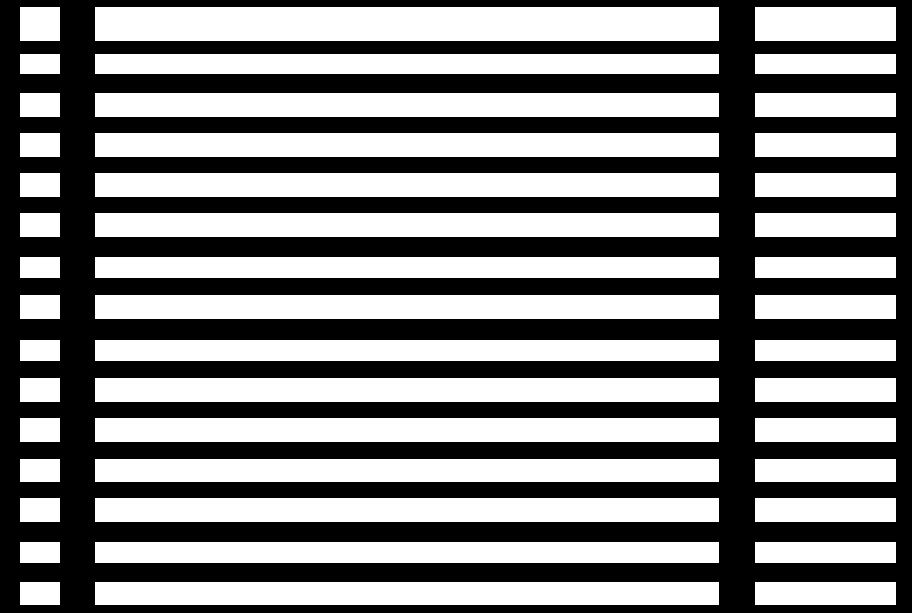

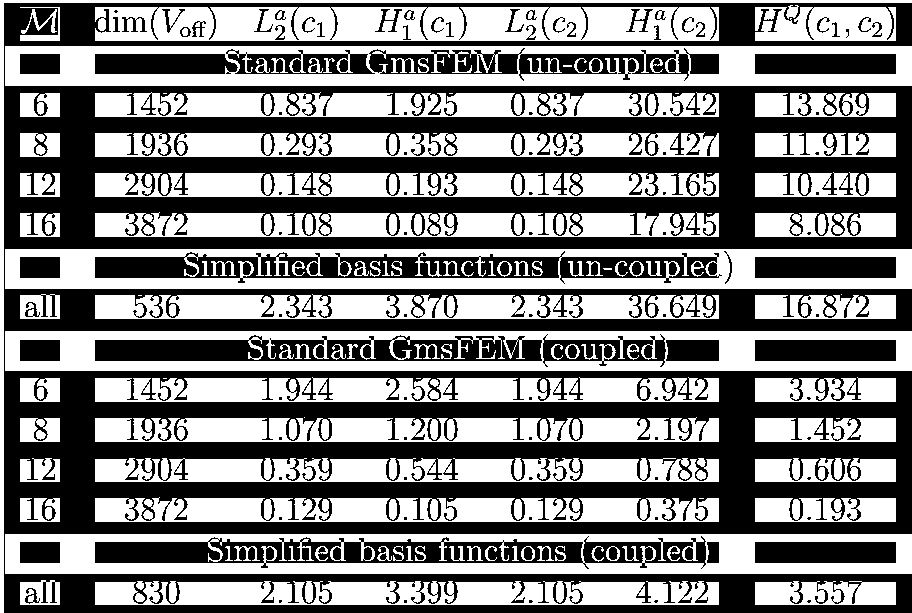

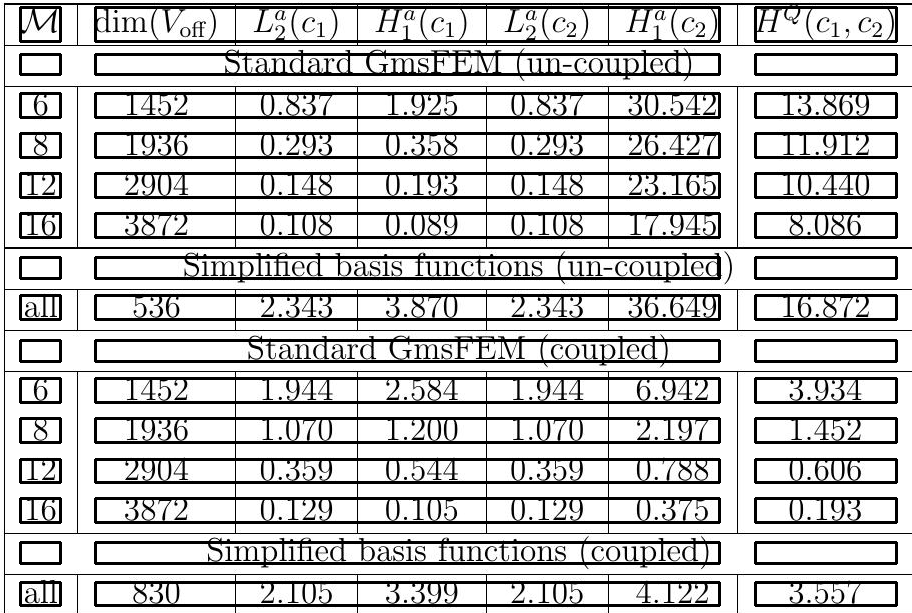

In [ ]:
list_table_boxes = []

for table in table_list:
    finalboxes, output_img = tsra.recognize_structure(table)
    list_table_boxes.append(finalboxes)

# XML Output 

In [ ]:
txml.output_to_xml(table_coords, list_table_boxes)

#Table Structure Recognition Bordered Tables

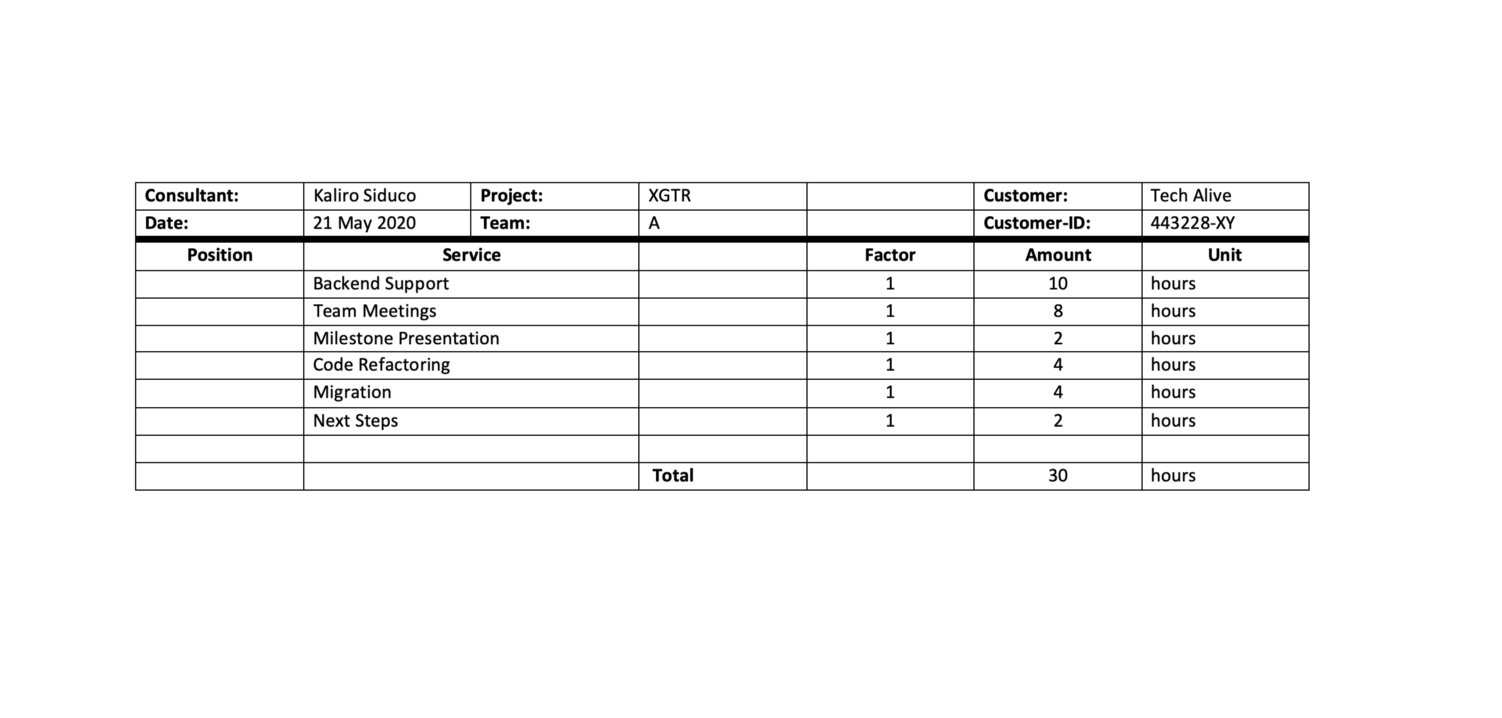

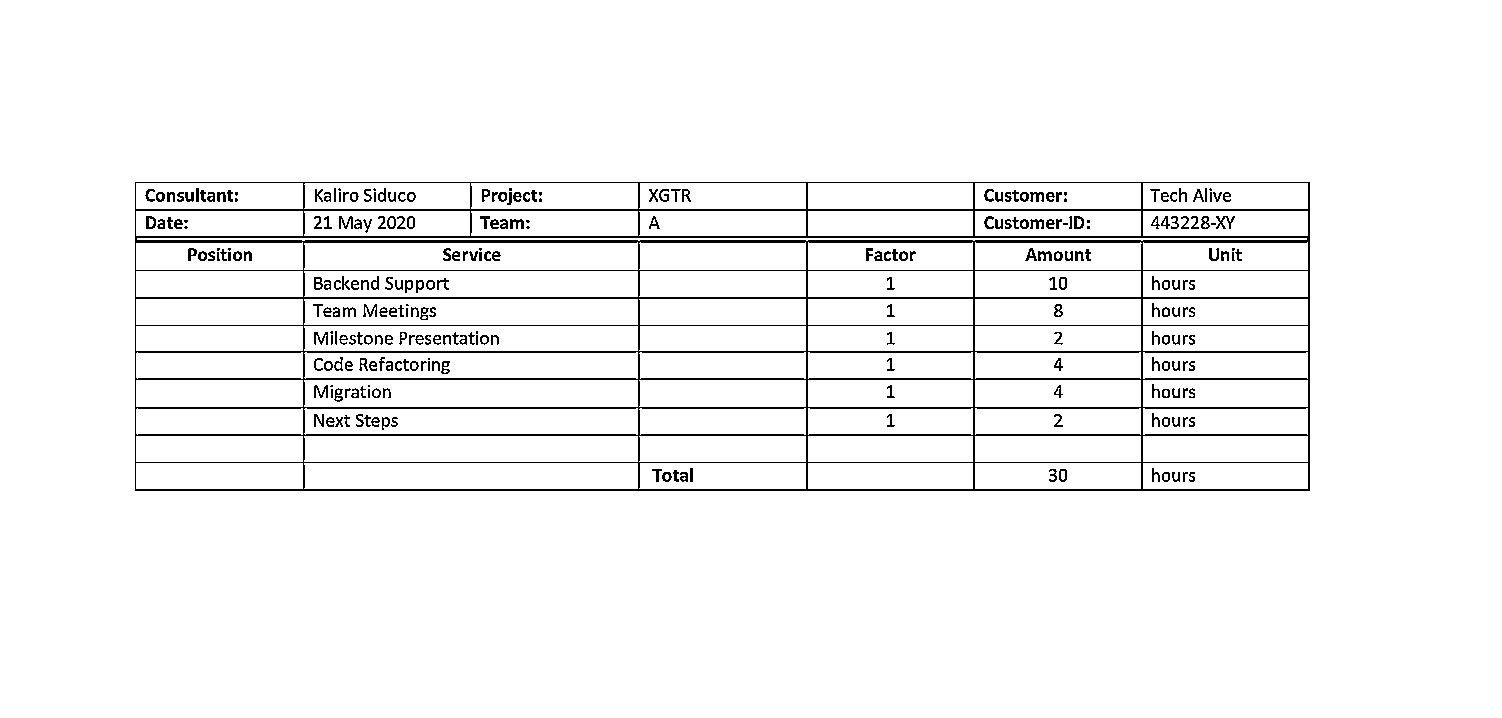

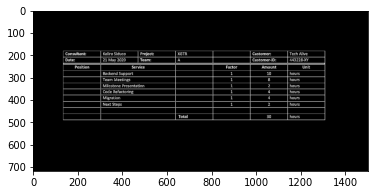

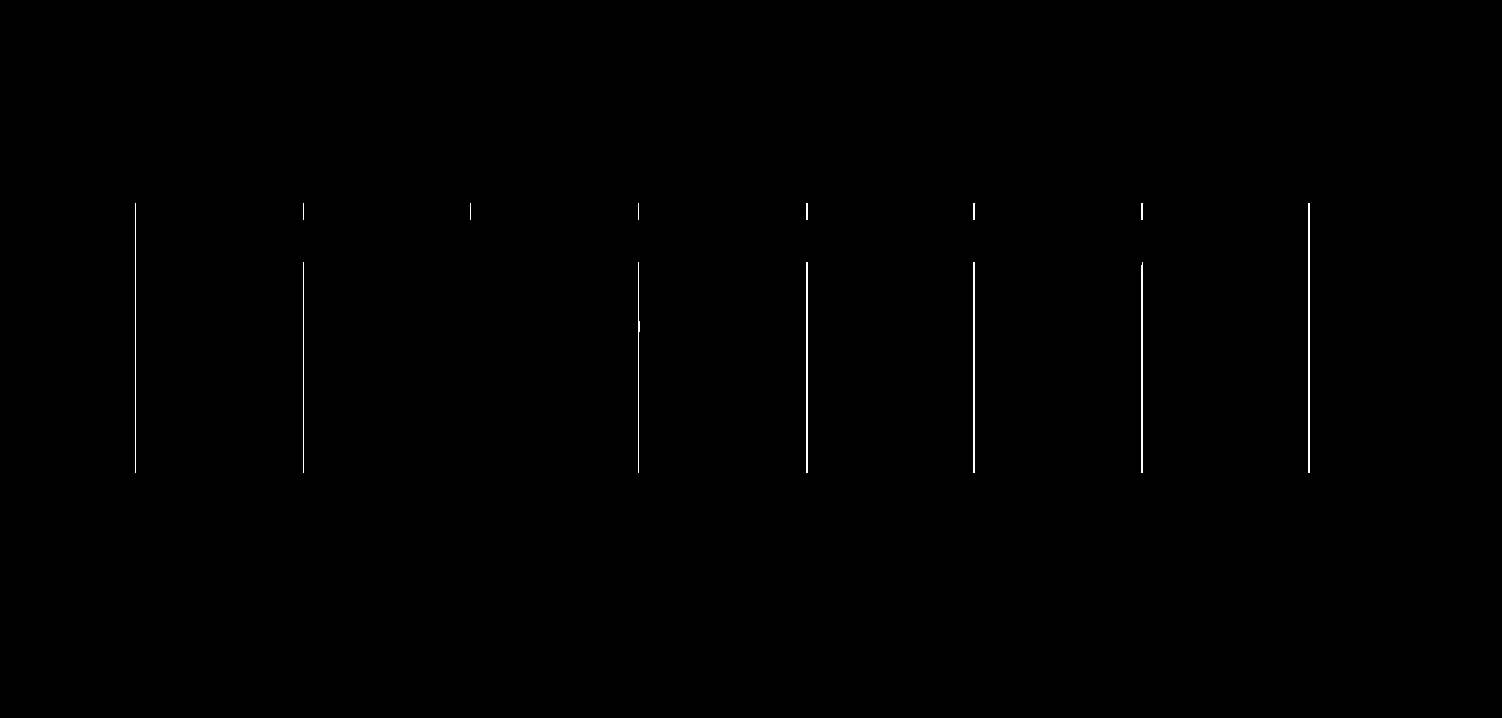

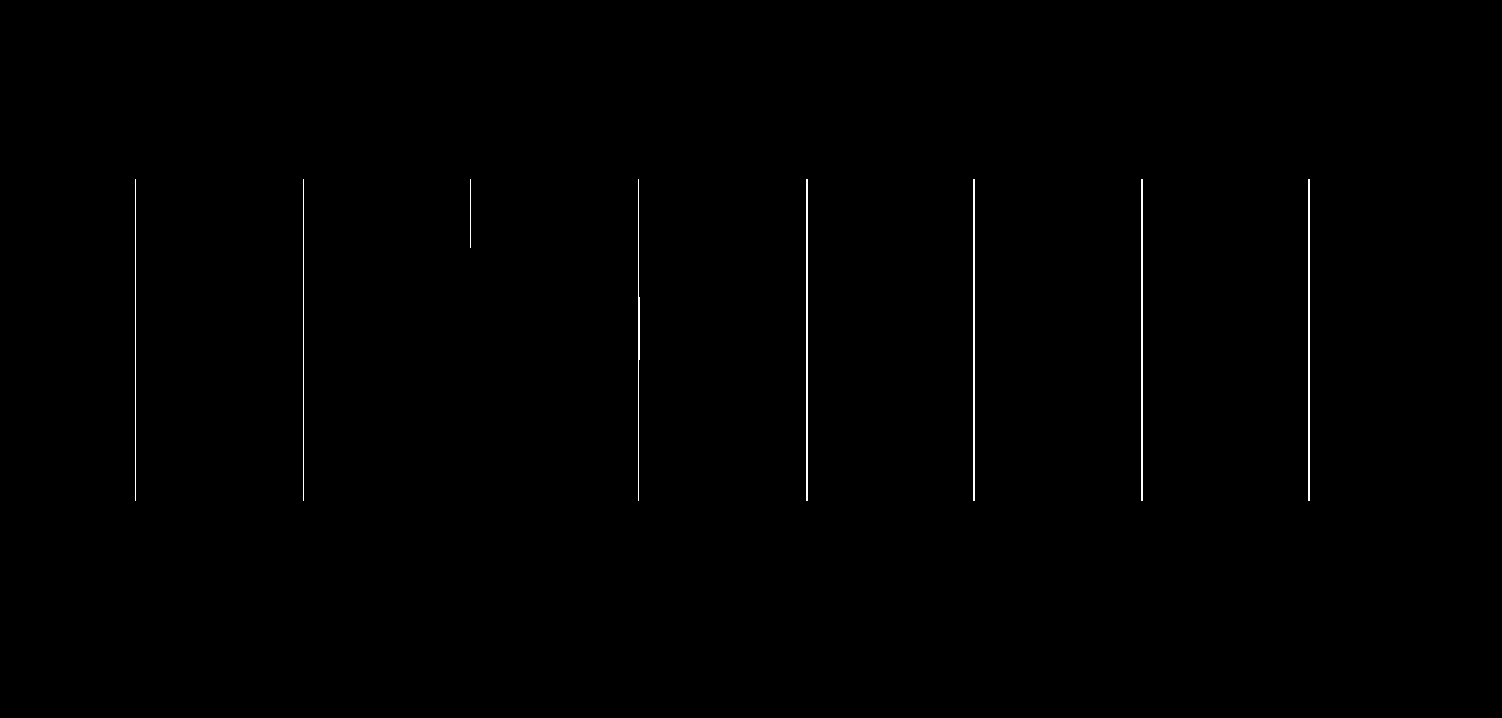

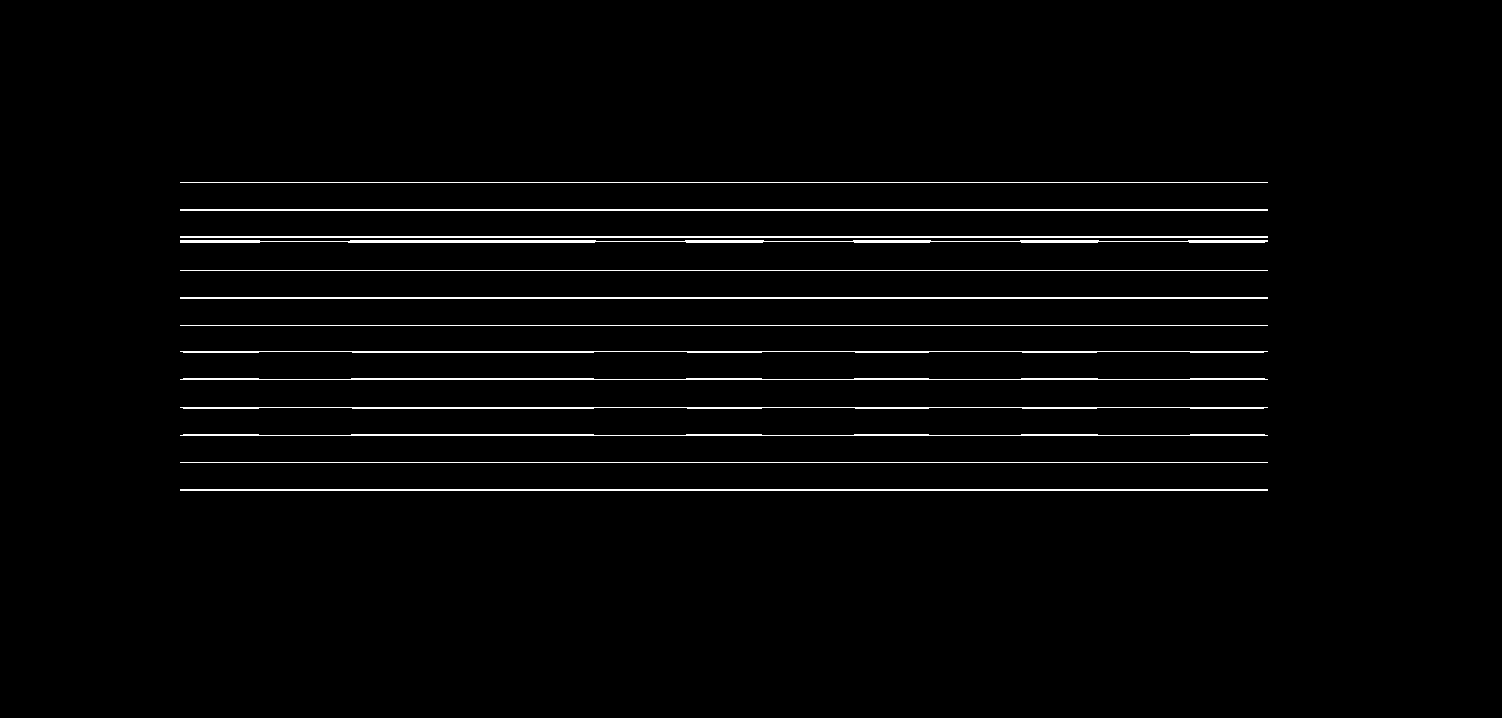

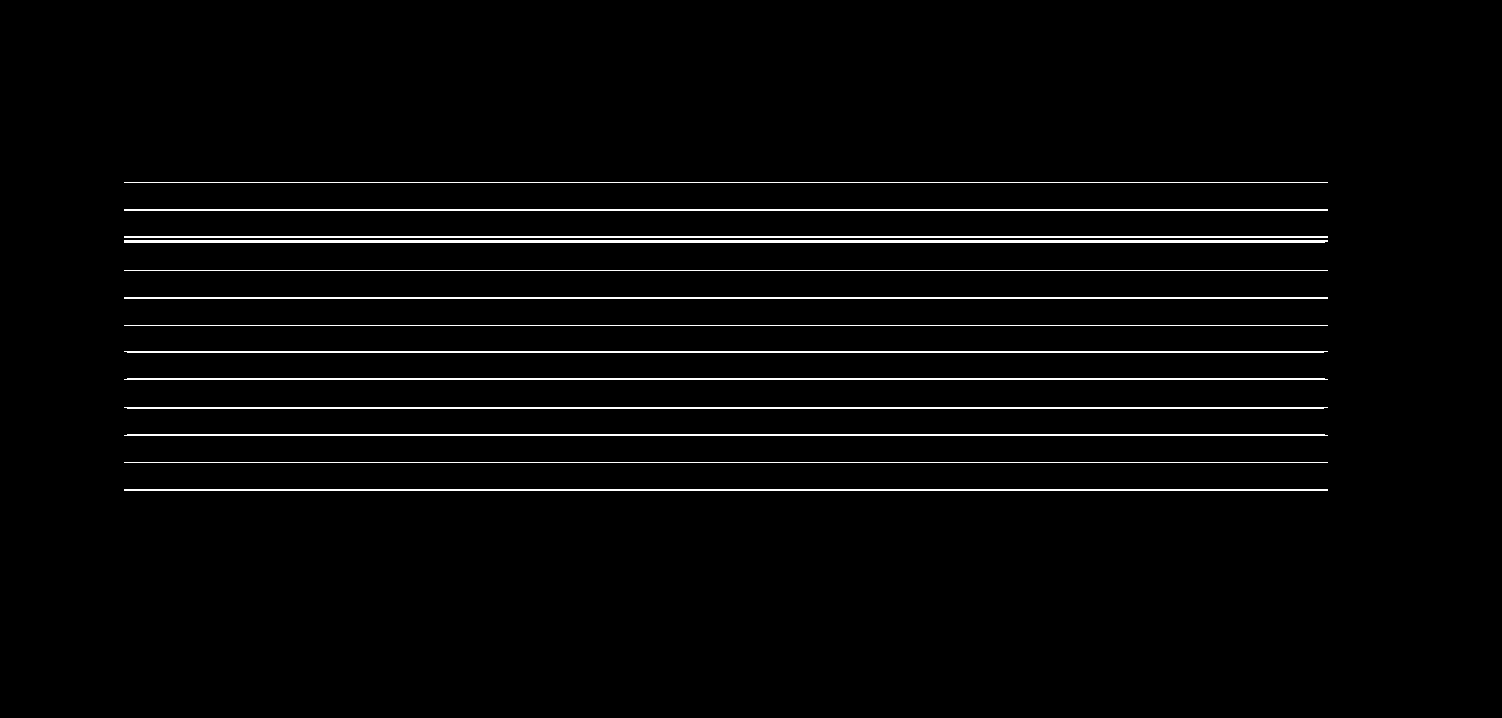

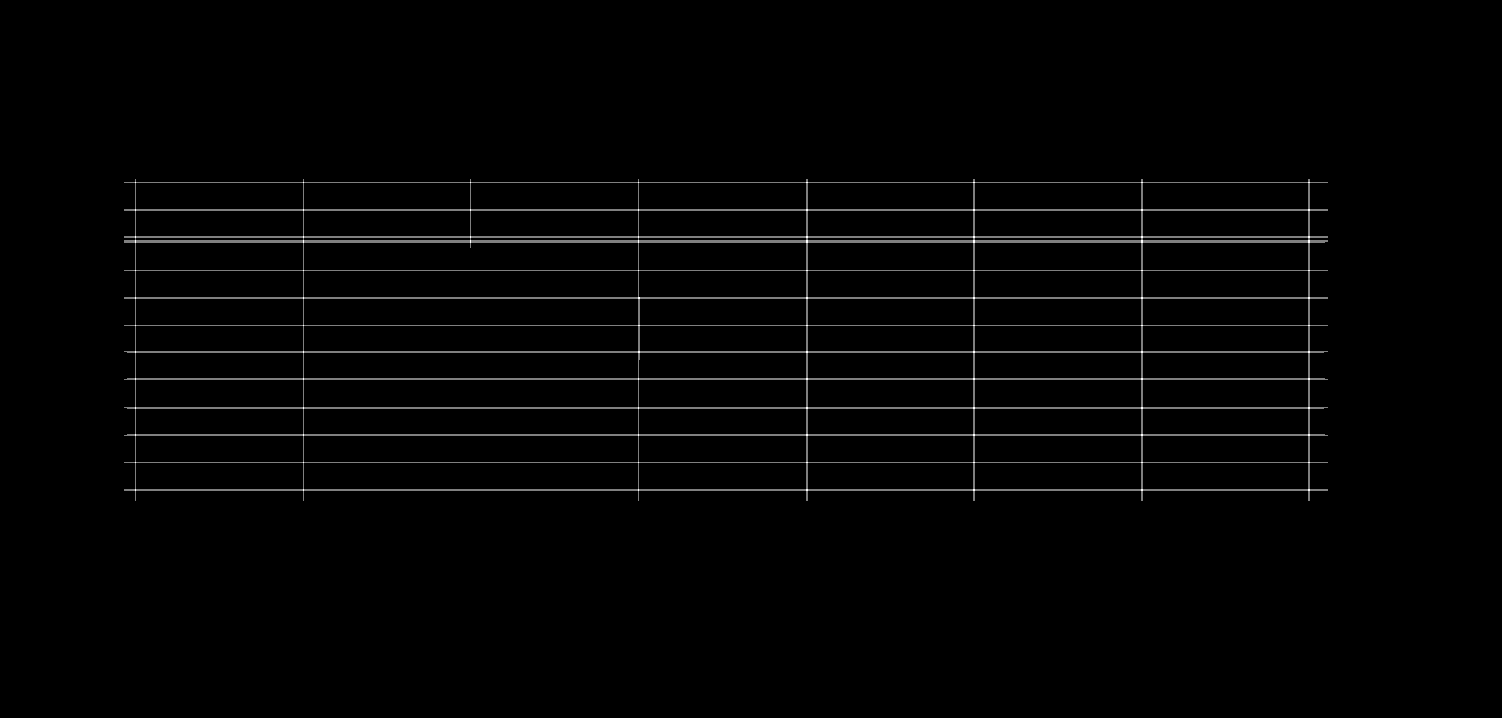

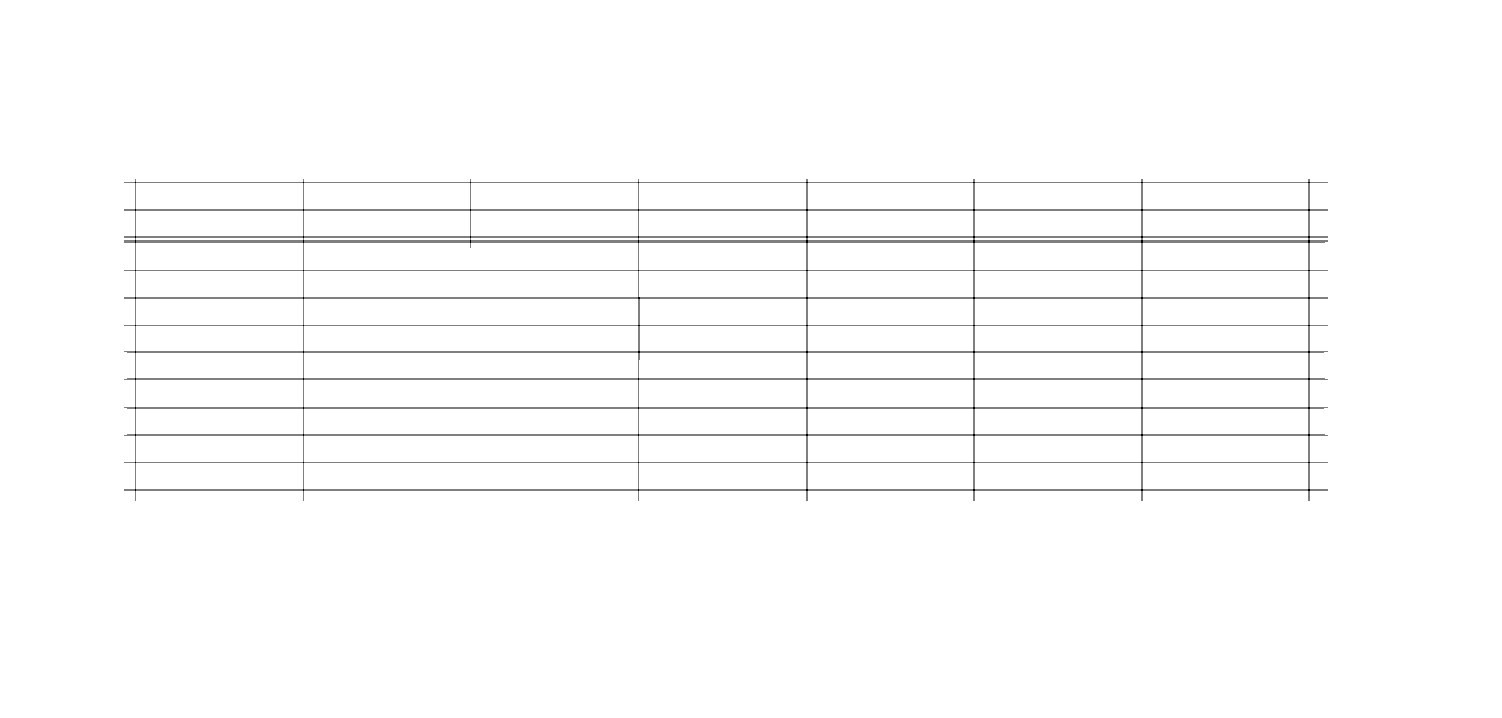

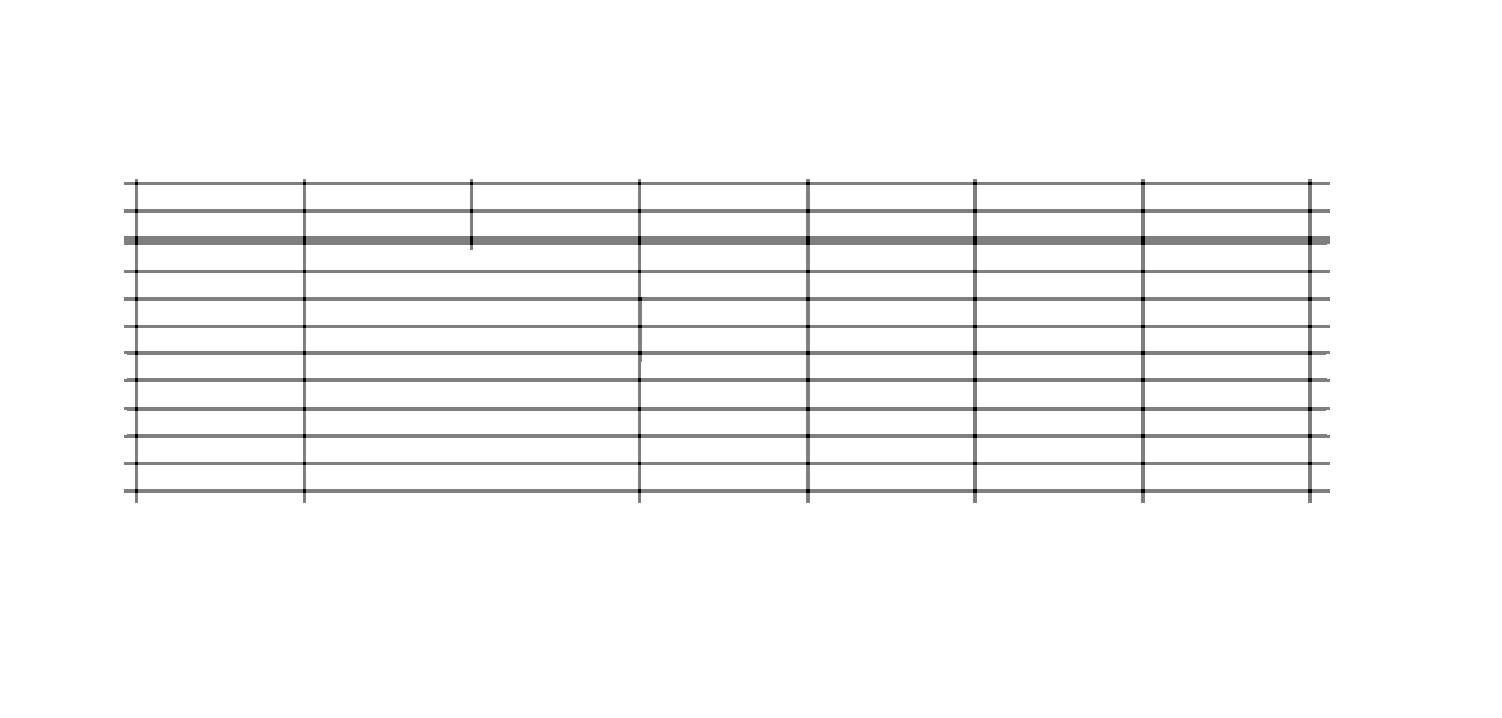

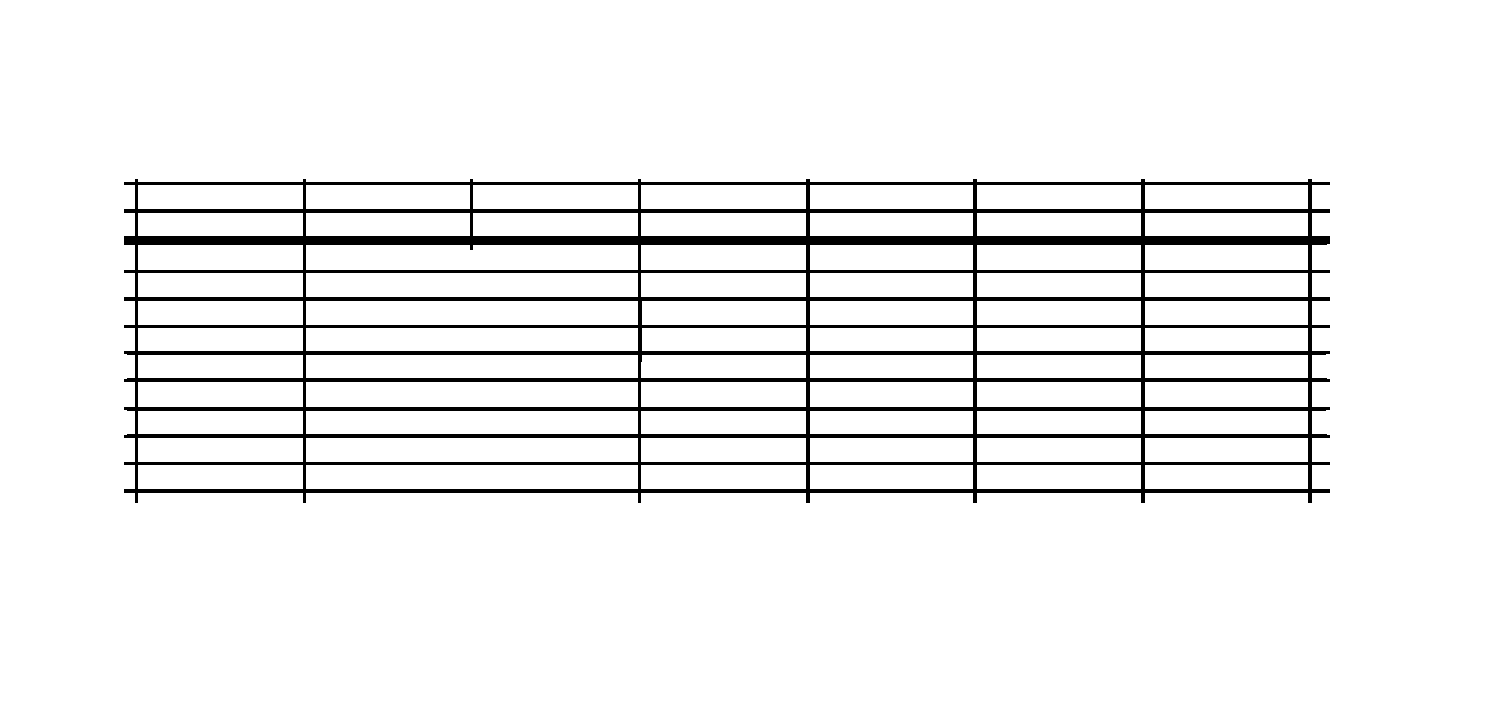

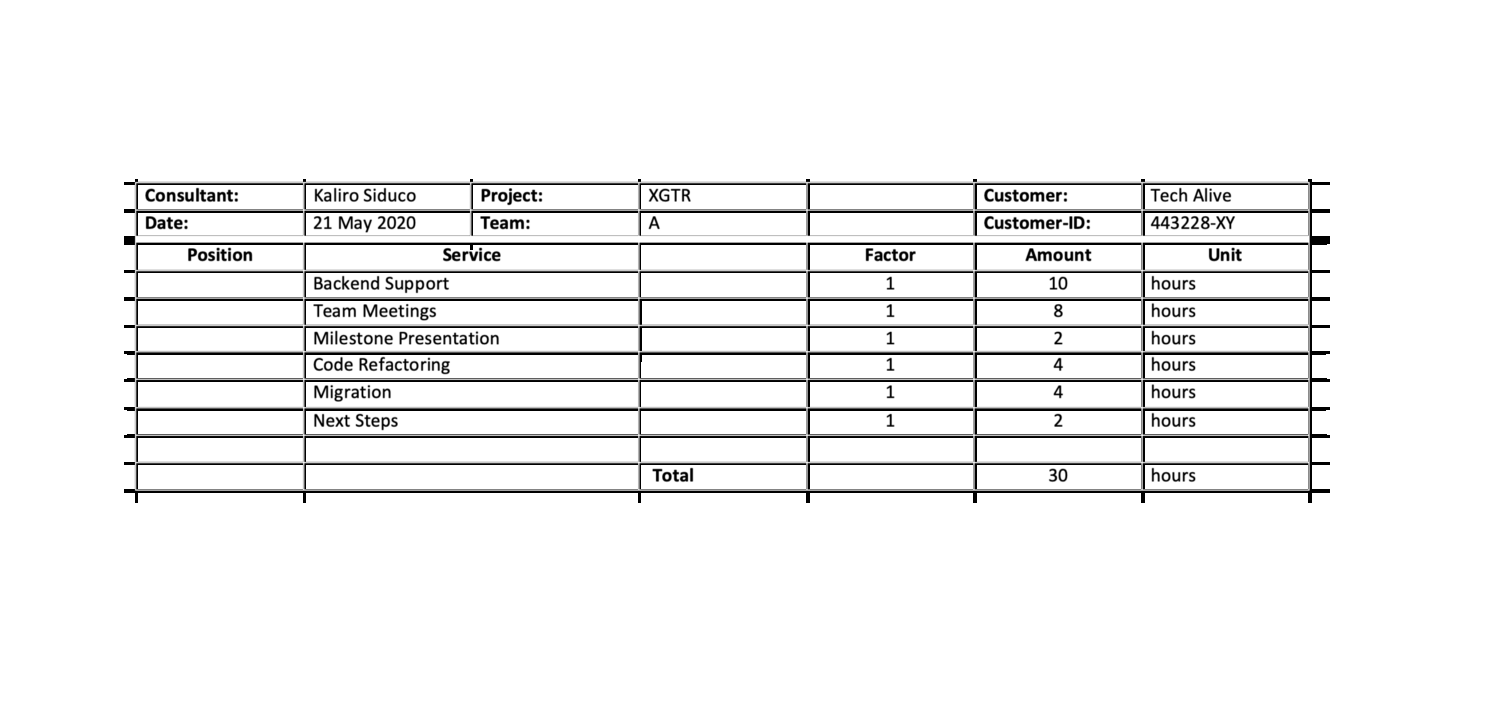

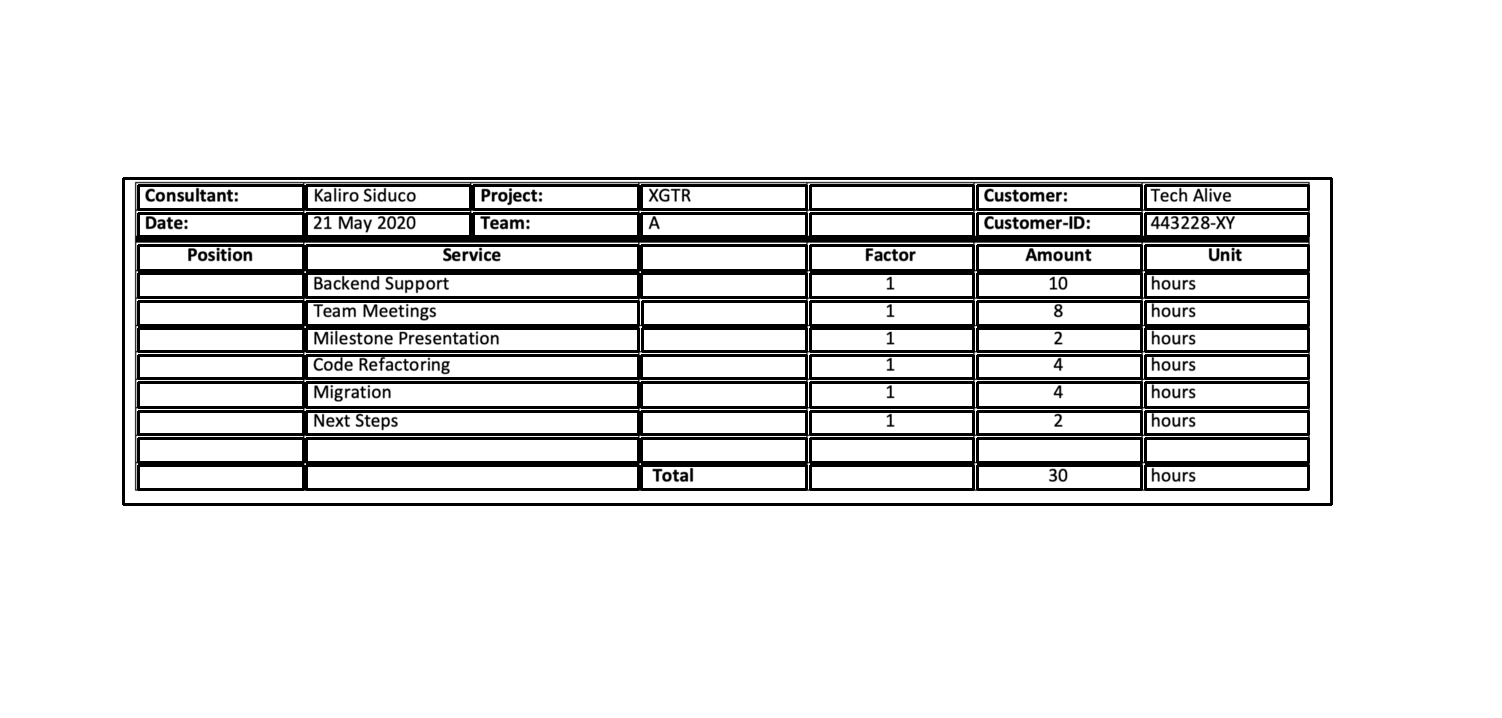

In [ ]:
bordered_table = cv2.imread("/content/Multi_Type_TD_TSR/images/bordered_example.png")
list_table_boxes = []

table_list = [bordered_table]

for table in table_list:
    finalboxes, output_img = tsrl.recognize_structure(table)
    list_table_boxes.append(finalboxes)

# Table Structure Recognition Unbordered Tables

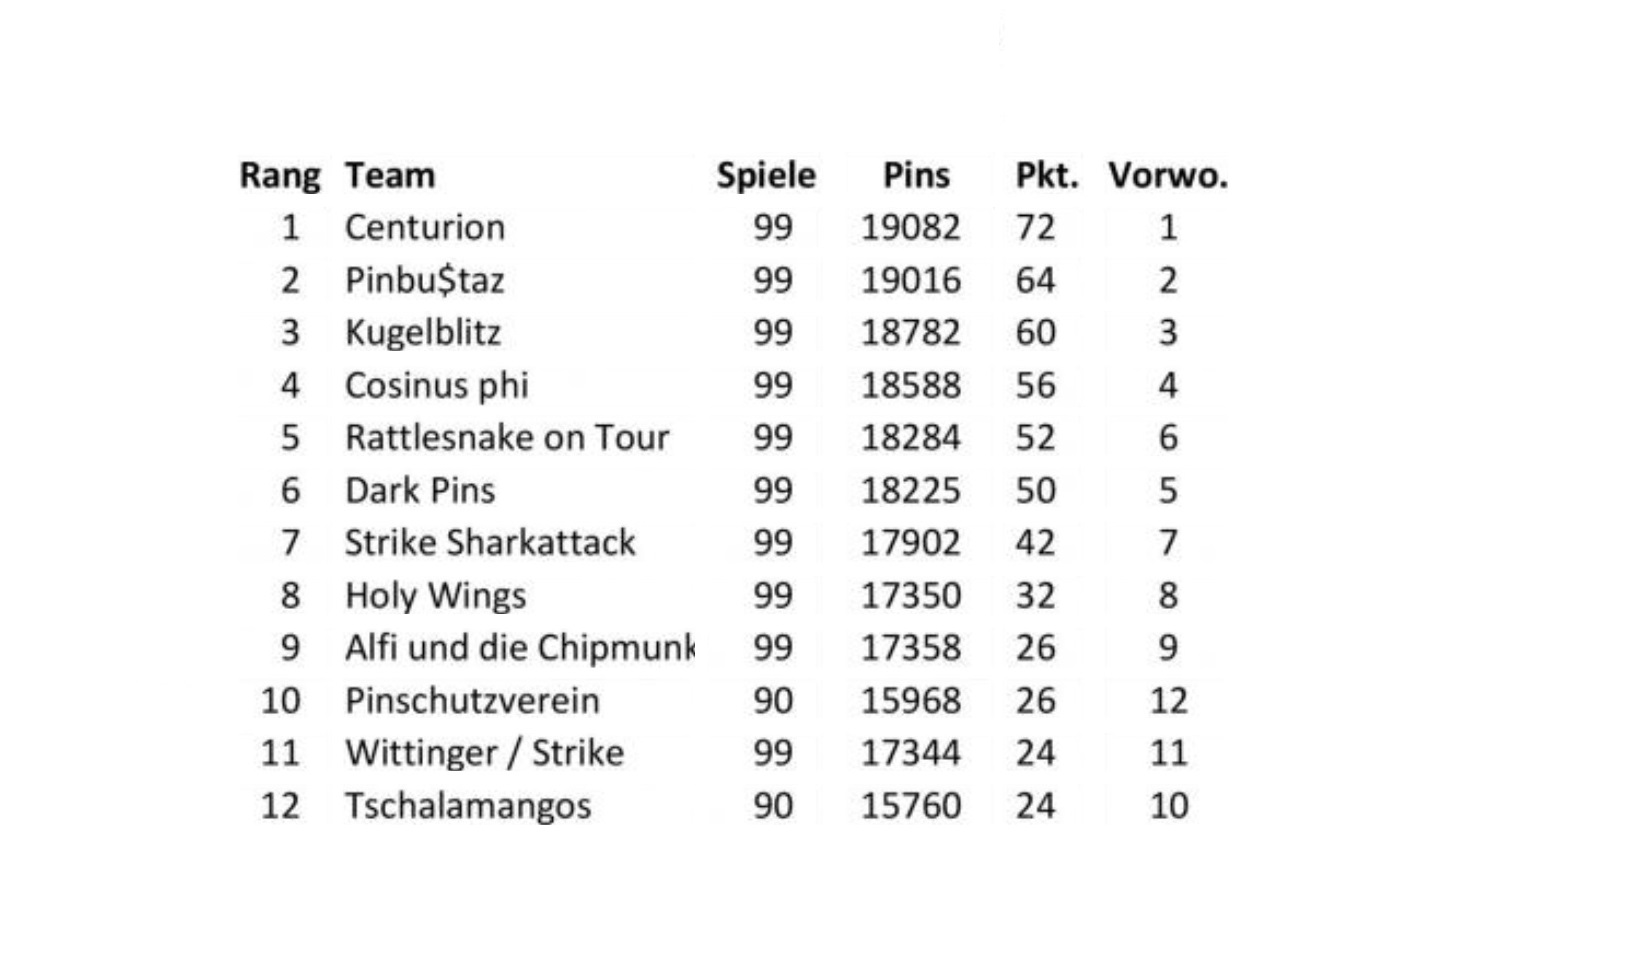

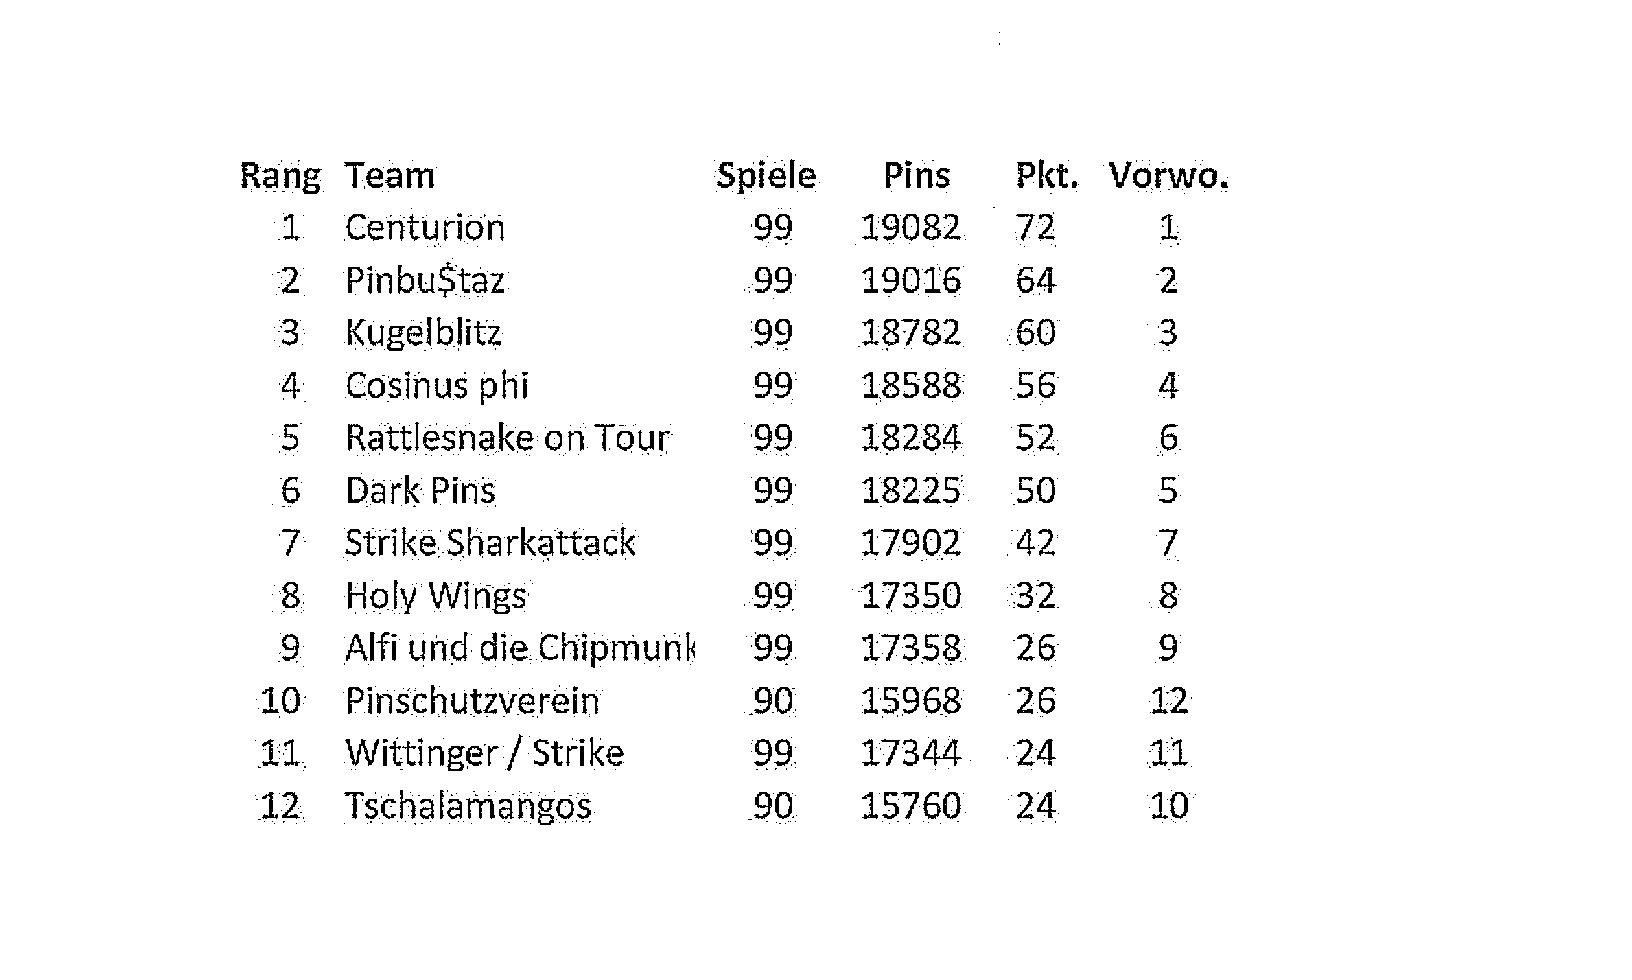

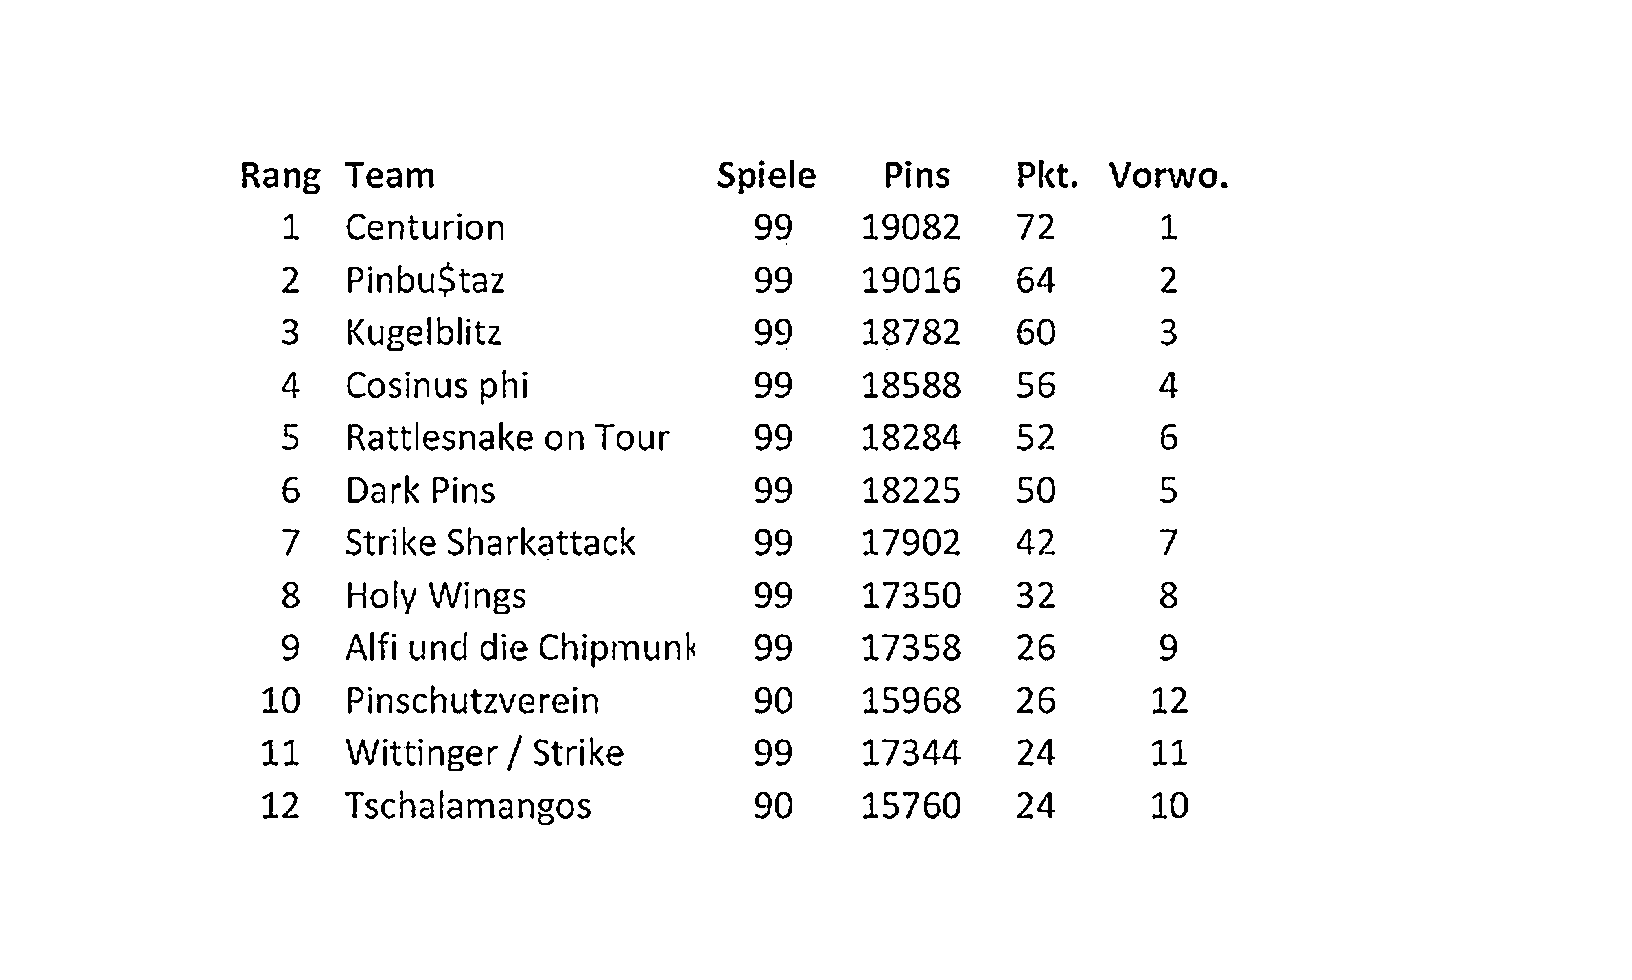

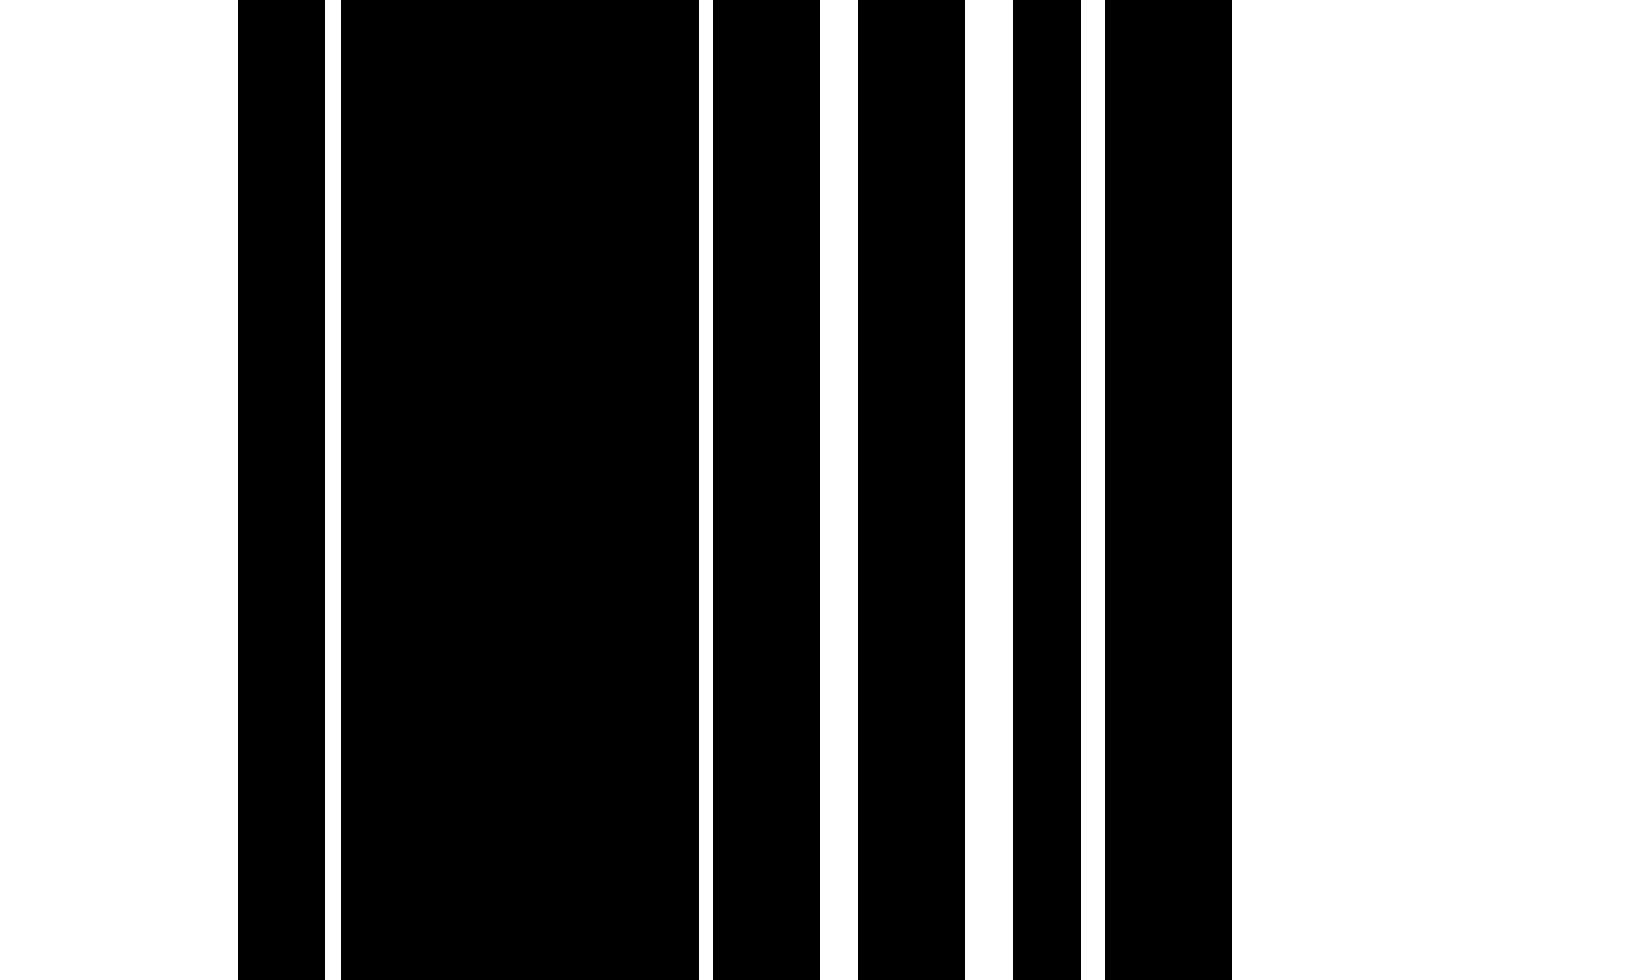

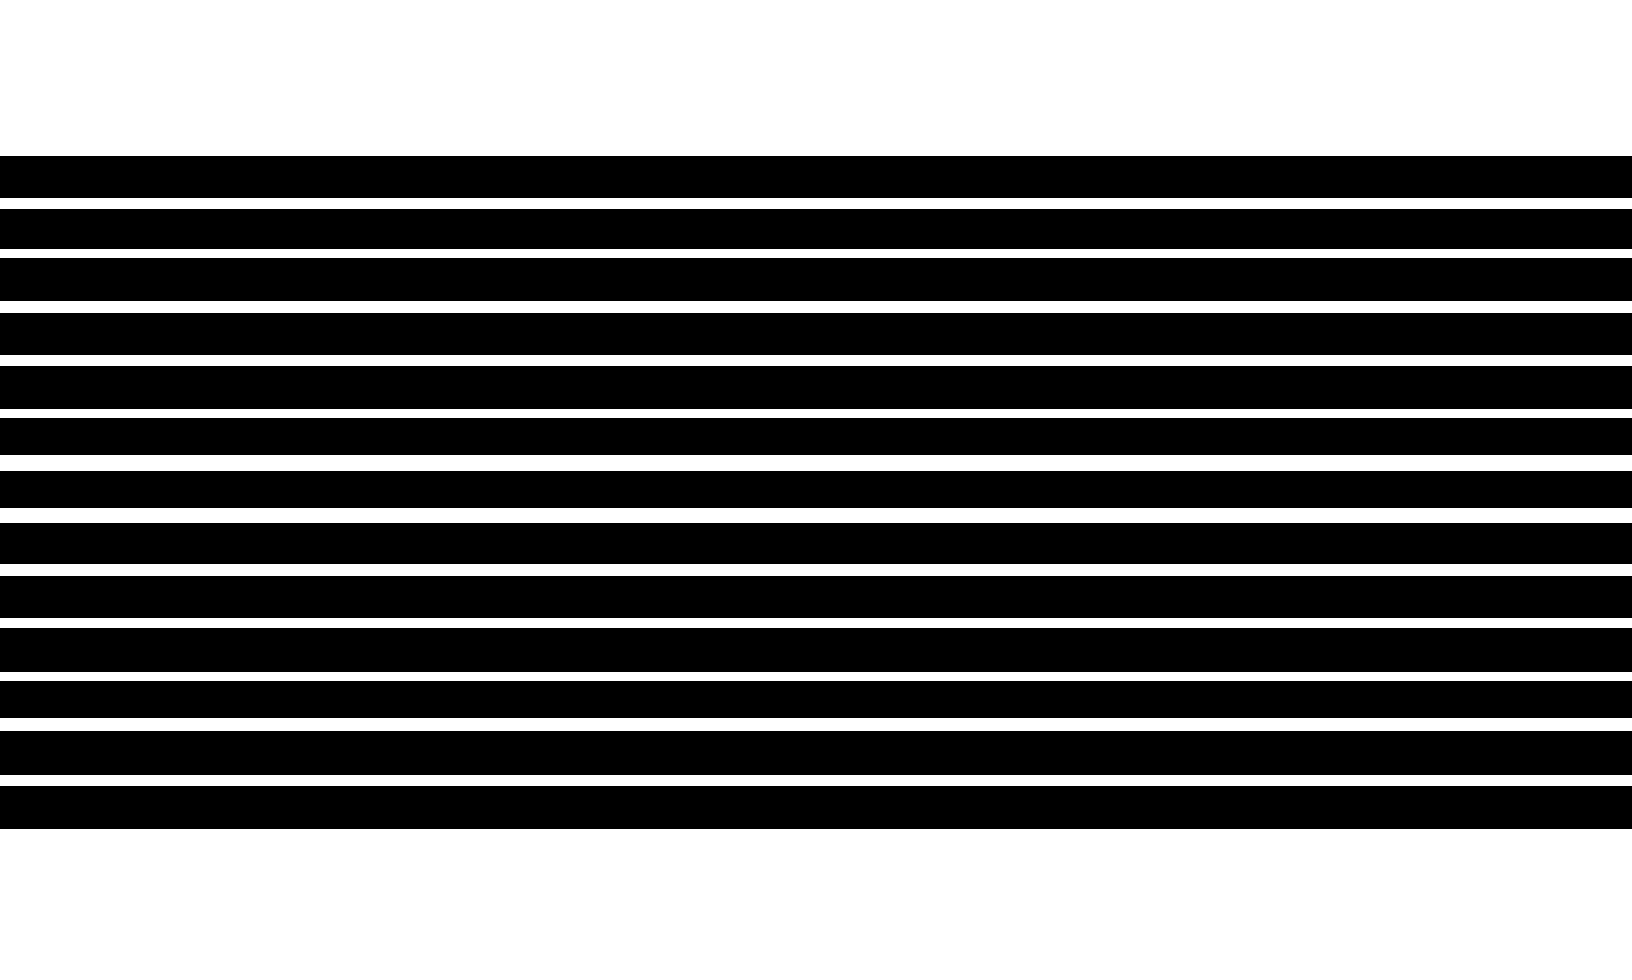

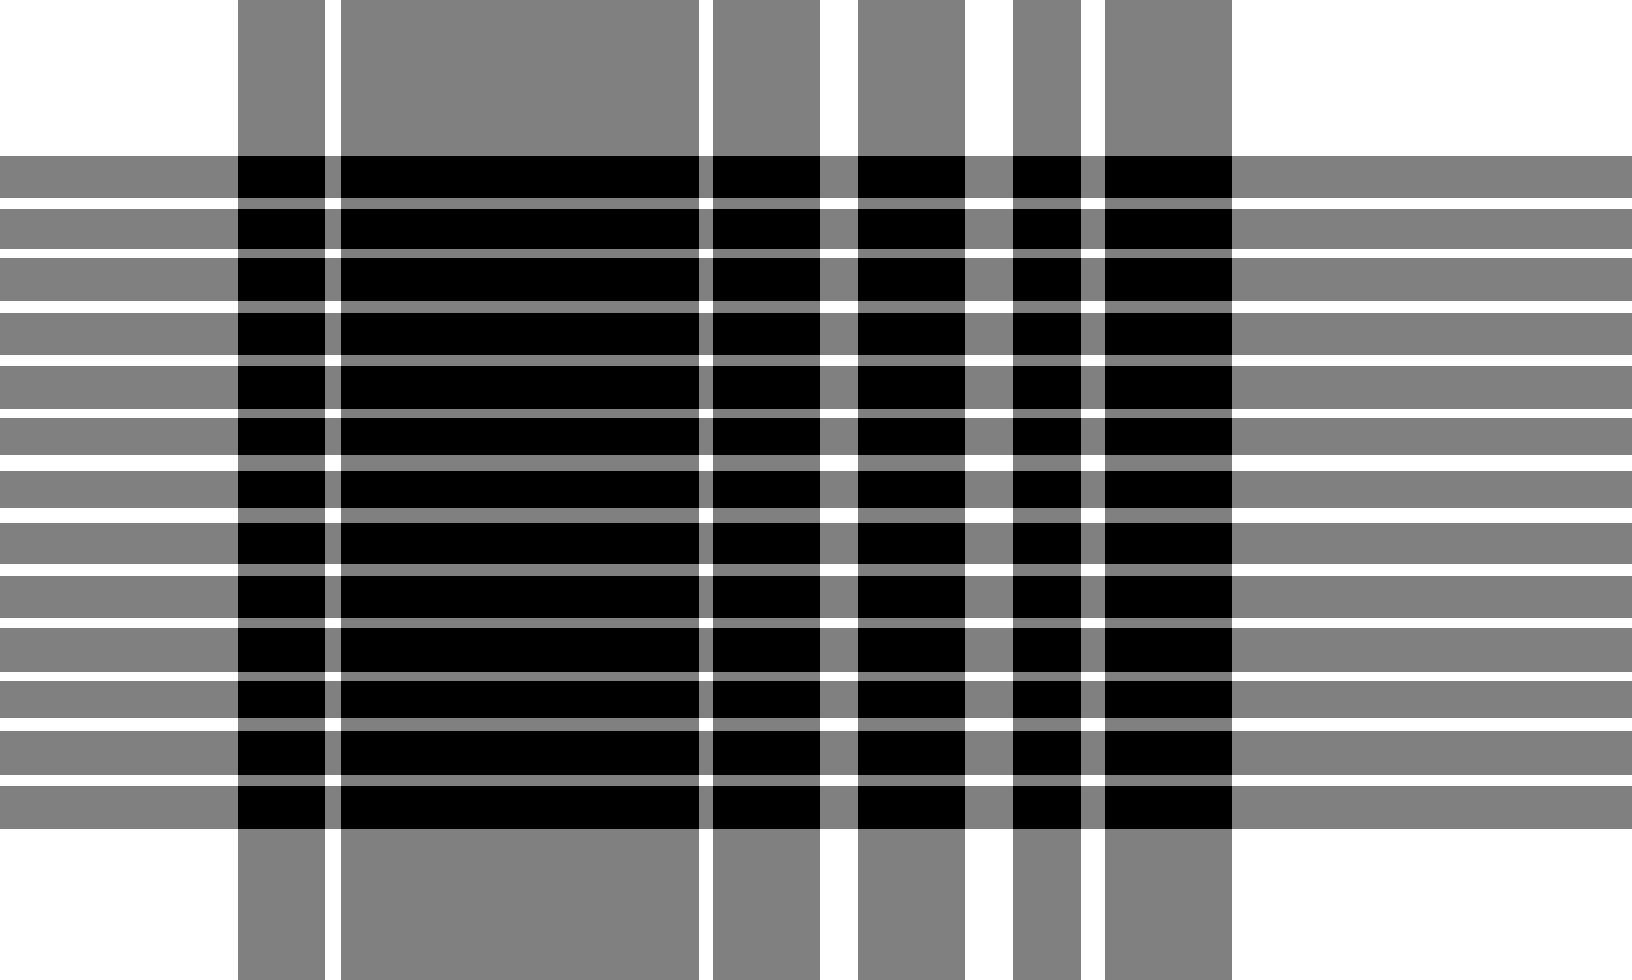

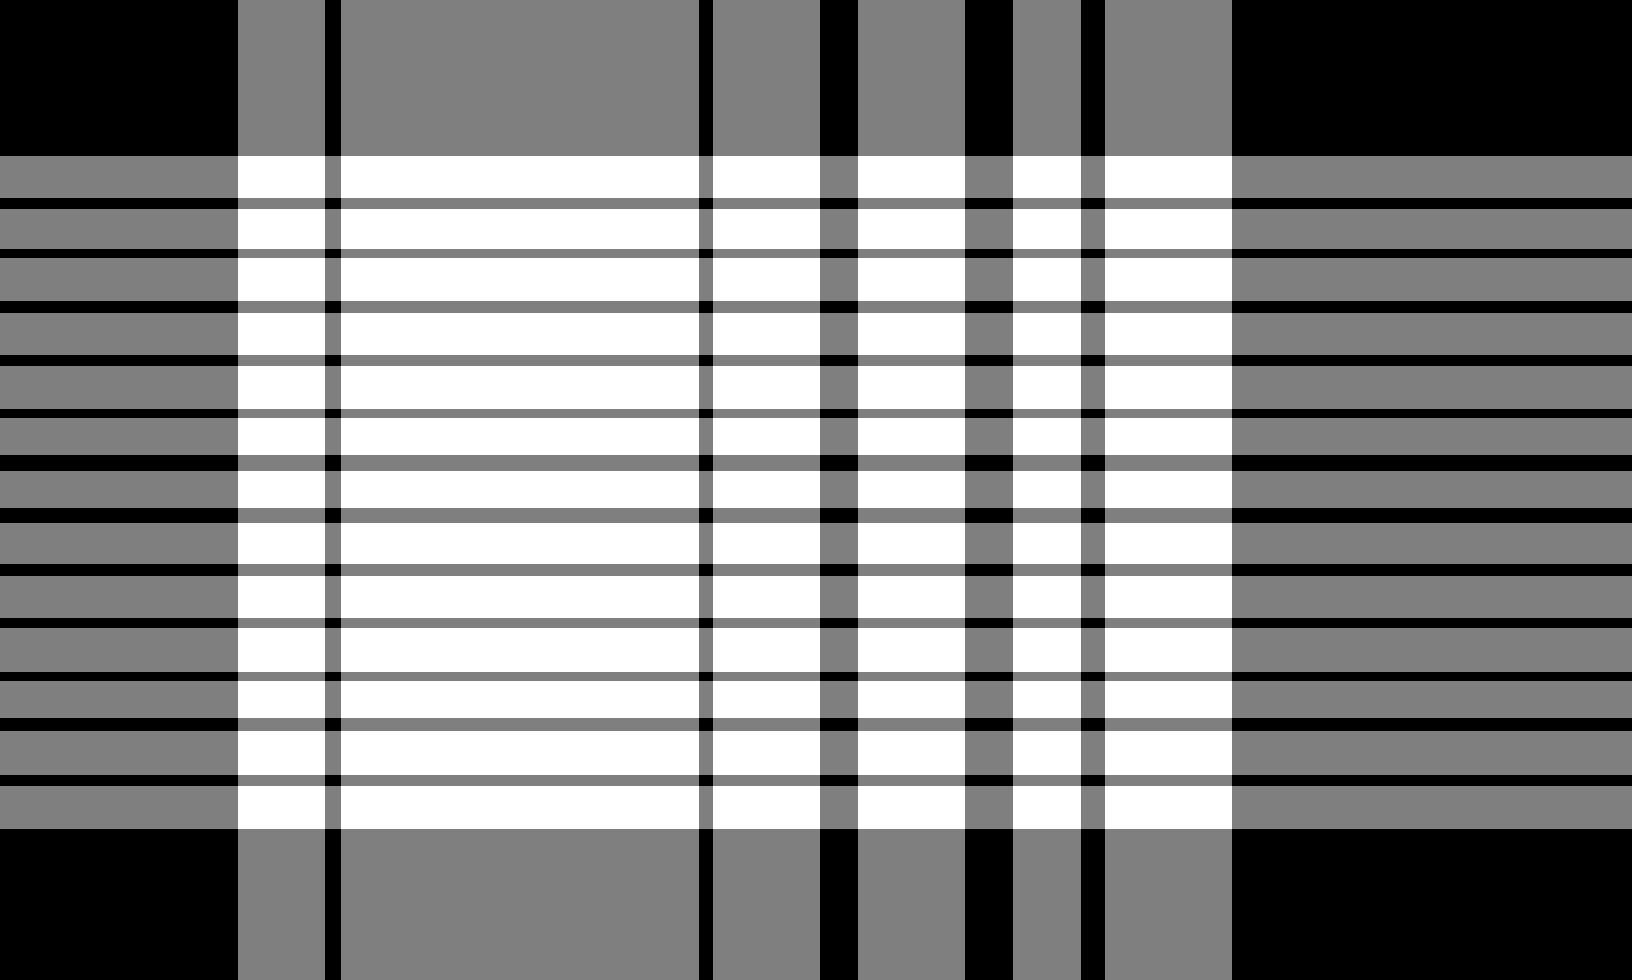

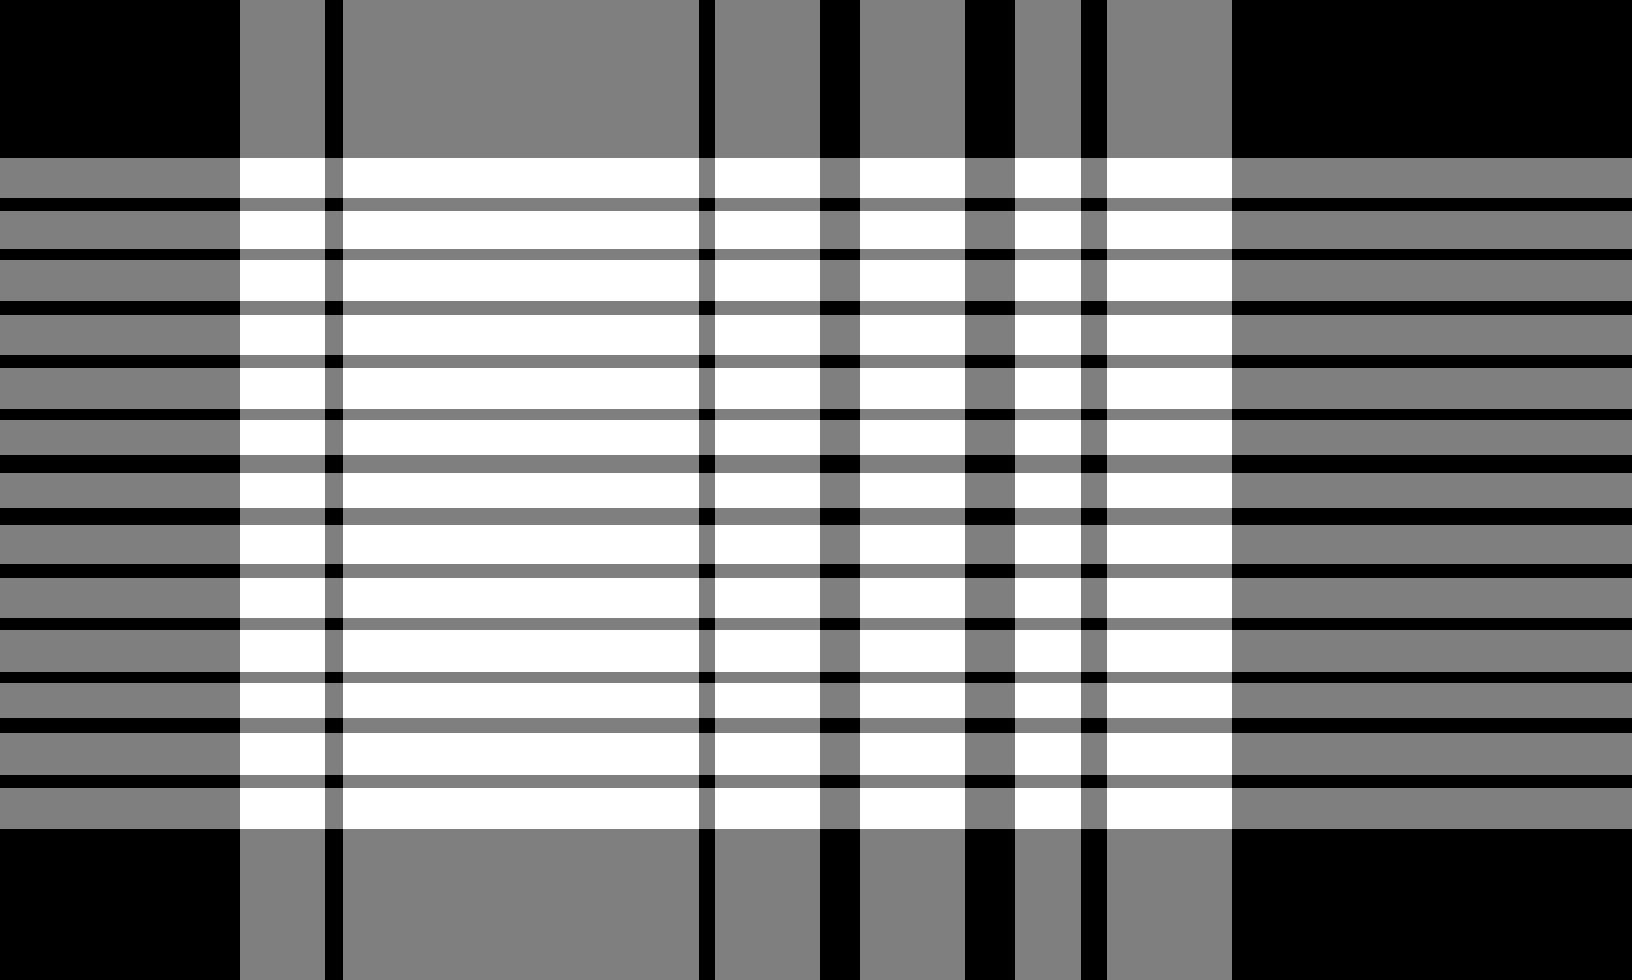

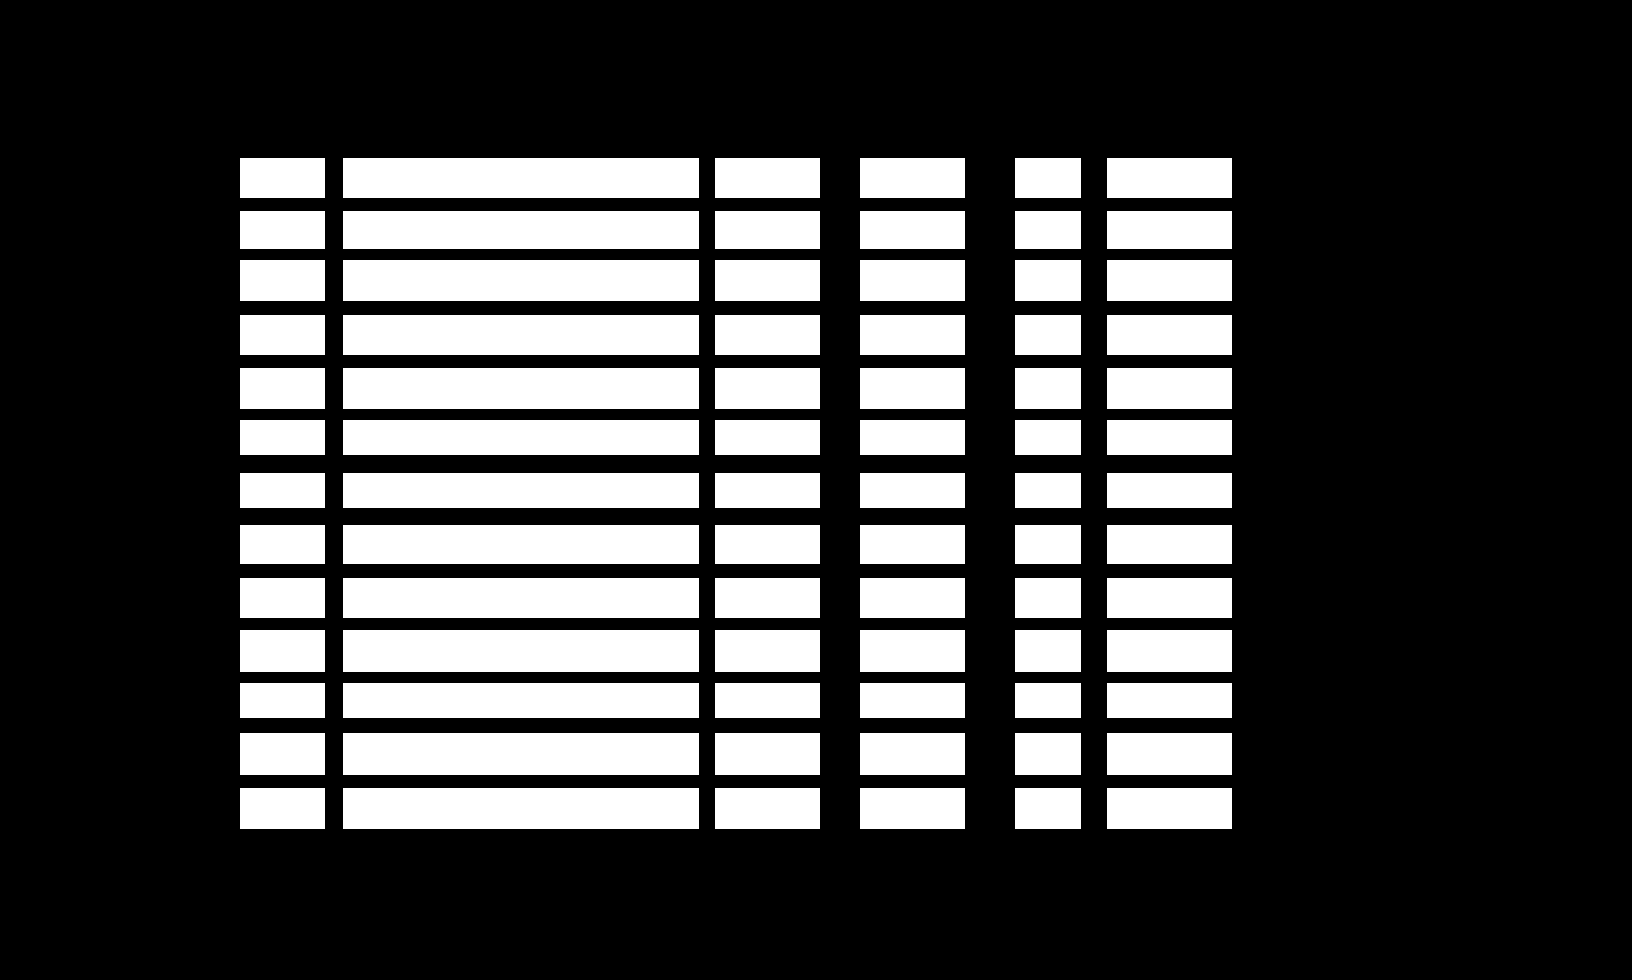

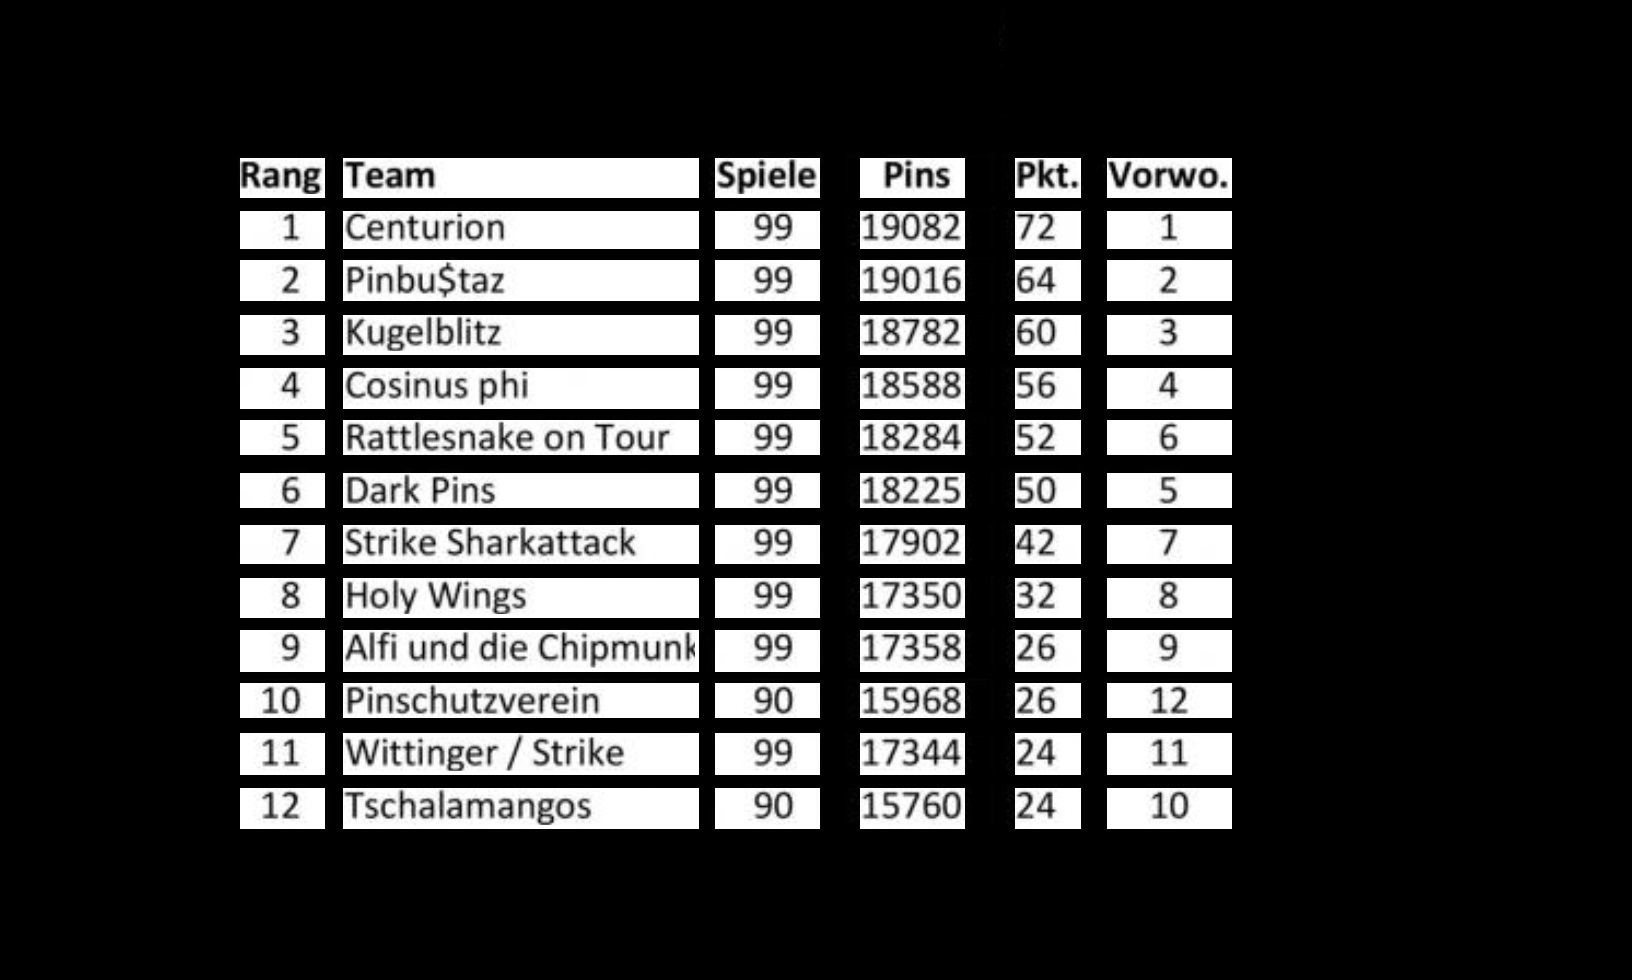

In [ ]:
unbordered_table = cv2.imread("/content/Multi_Type_TD_TSR/images/unbordered_example.jpg")
list_table_boxes = []

table_list = [unbordered_table]

for table in table_list:
    finalboxes, output_img = tsrwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

#Table Structure Recognition Partially Bordered Tables

TABLE 0 :


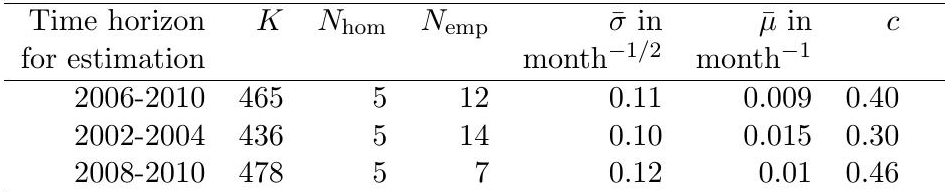

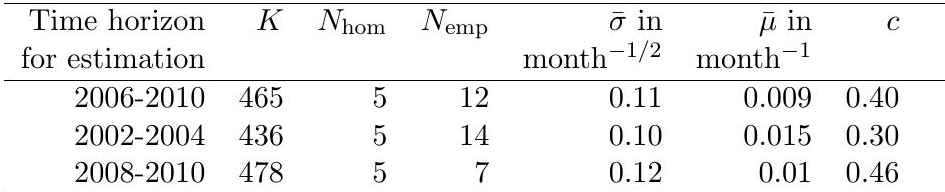

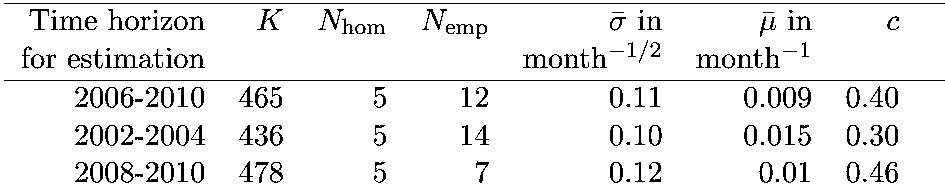

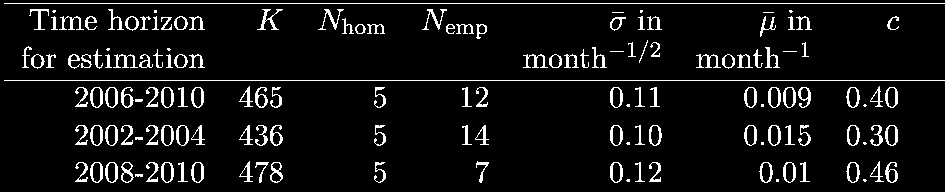

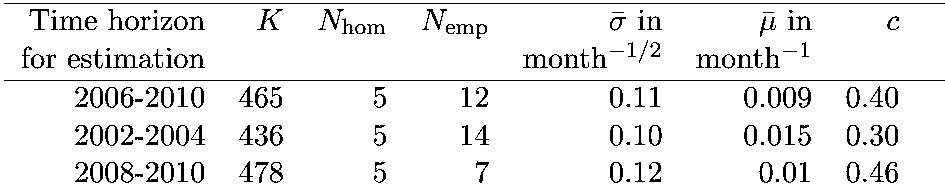

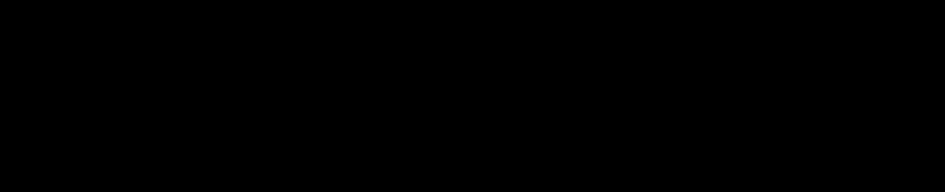

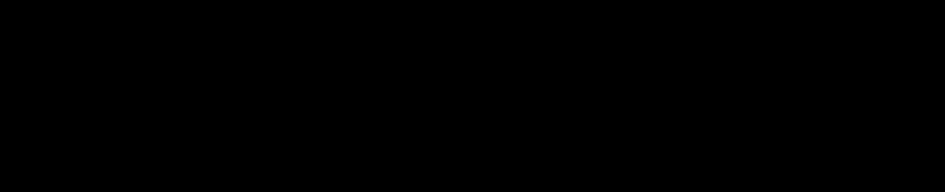

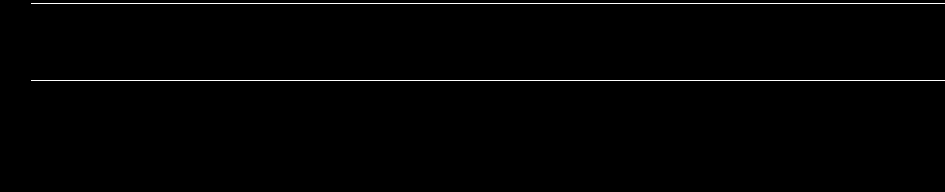

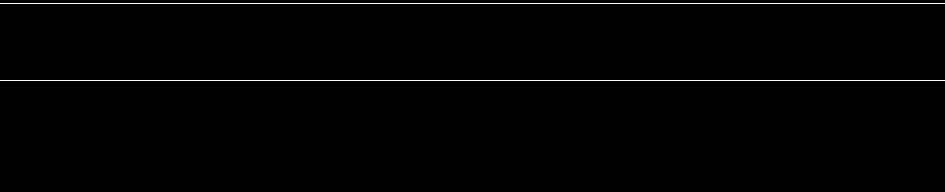

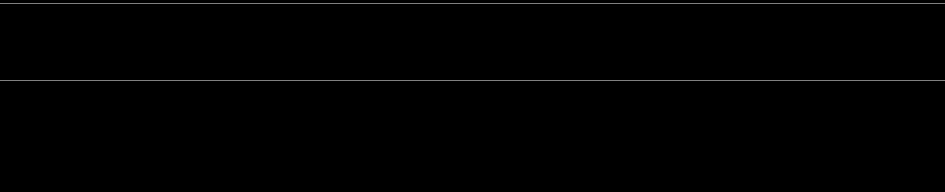

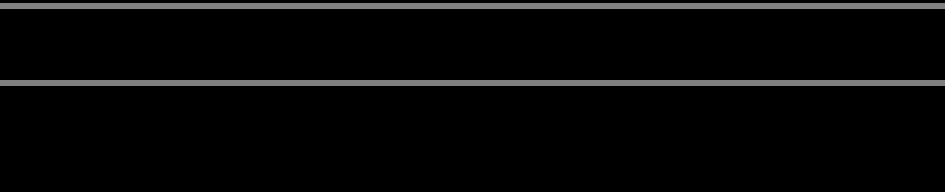

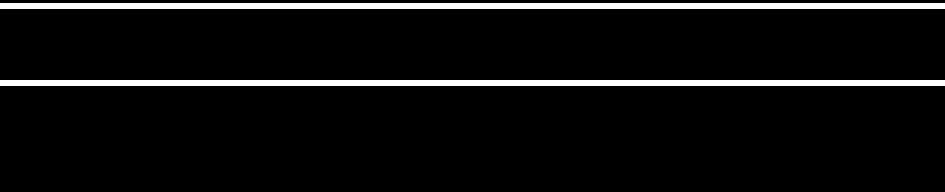

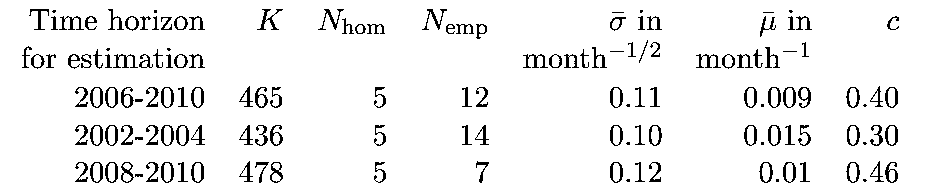

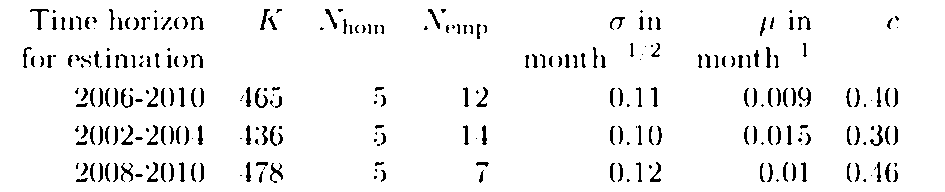

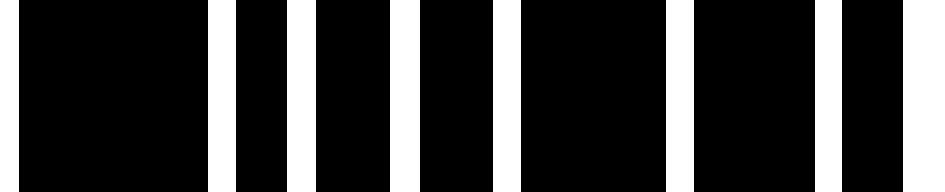

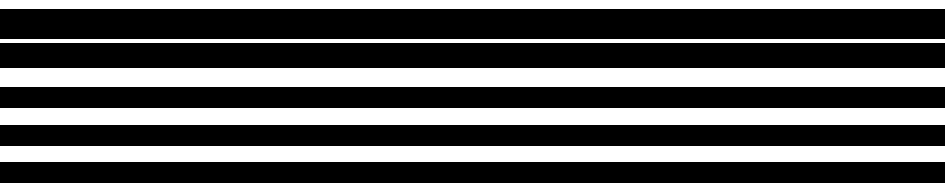

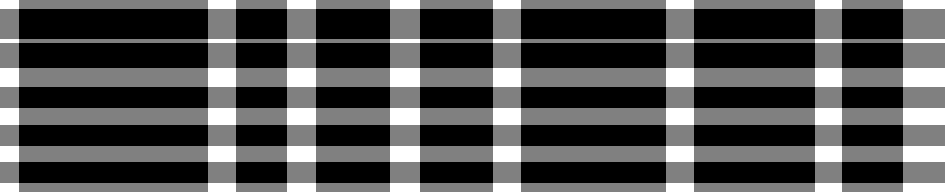

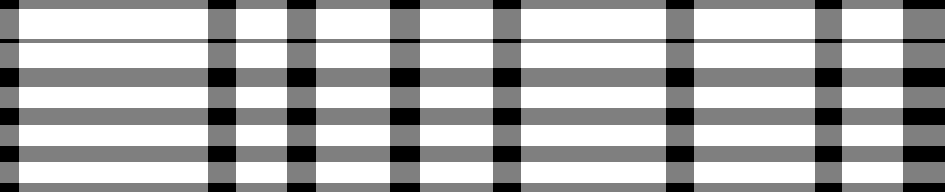

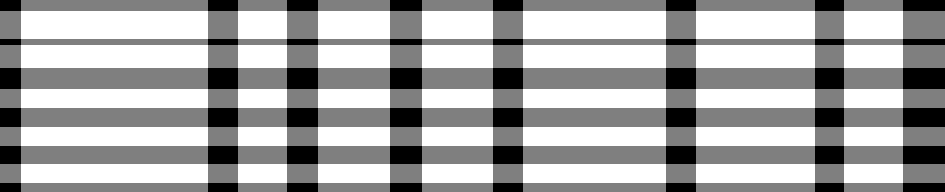

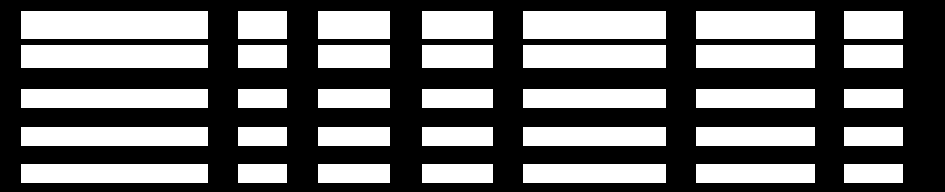

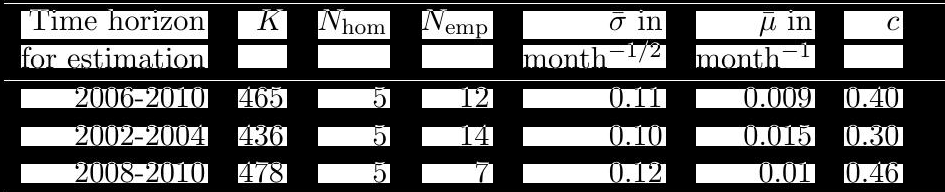

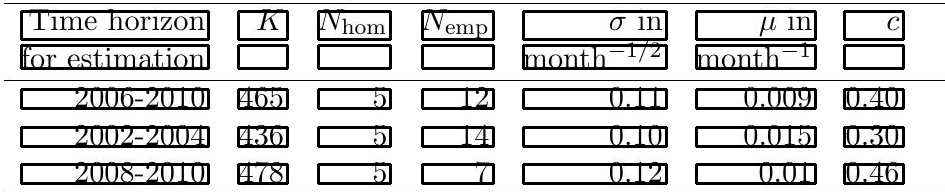

In [ ]:
document_example = cv2.imread("/content/Multi_Type_TD_TSR/images/7.tar_1601.03015.gz_crs_19_ori.jpg")

table_list, table_coords = table_detection.make_prediction(document_example, predictor)
list_table_boxes = []
for table in table_list:
    finalboxes, output_img = tsrlwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

#Additional Feature: OCR with PyTesserect (Output in CSV)

In [ ]:
tocr.output_to_csv(list_table_boxes[0], output_img)

                 0      1      2       3       4        5   6
0    ‘Lime horizon      K   Nhom   N emp            ji in   c
1   for estimation                         month   month!    
2     VUUb6-2Z2U1U   A65D      5            U.11             
3        YU2-20V04   A436      5                             
4      VUUS-2ZU01U    AT&      5       7    U.12     Q.OL    
